## IMDB Movie Database Analysis
### Dataset: https://www.imdb.com/interfaces/
### Run Procedure:
#### 1. Download the data set (for learners data set is also available with code, but please refer)
#### 2. Extract to "folder-name" the data set using 7Zip and replace the "." with "_"
#### Note: Data set must exists on the same path where the code is placed inside dataset folder, if new data is downloaded then filenames and folder structure must be same as mentioned in code.
##### OR use the available compressed dataset in github and use directly after unzip

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

### Reading data set

In [6]:
title_akas_df = pd.read_csv('.\\dataset\\title_akas_data.tsv',sep='\t')
title_basics_df = pd.read_csv(".\\dataset\\title_basics_data.tsv",sep='\t')
title_ratings_df = pd.read_csv(".\\dataset\\title_ratings_data.tsv",sep='\t')
title_crew_df = pd.read_csv('.\\dataset\\title_crew_data.tsv',sep='\t')

In [7]:
print("Shape of data title_akas_df", title_akas_df.shape)
title_akas_df.head()

Shape of data title_akas_df (28795631, 8)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [8]:
print("Shape of data title_basics_df", title_basics_df.shape)
title_basics_df.head()

Shape of data title_basics_df (8191443, 9)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [9]:
print("Shape of data title_ratings_df", title_ratings_df.shape)
title_ratings_df.head()

Shape of data title_ratings_df (1183167, 3)


,tconst,averageRating,numVotes
0,tt0000001,5.7,1807
1,tt0000002,6.0,233
2,tt0000003,6.5,1558
3,tt0000004,6.1,152
4,tt0000005,6.2,2383


In [10]:
print("Shape of data title_crew_df", title_crew_df.shape)
title_crew_df.head()

Shape of data title_crew_df (8194020, 3)


,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [11]:
#Renaming tconst to merge data in common frame
title_basics_df=title_basics_df.rename({'tconst':'titleId'}, axis=1)
title_ratings_df=title_ratings_df.rename({'tconst':'titleId'}, axis=1)
title_crew_df=title_crew_df.rename({'tconst':'titleId'}, axis=1)

In [12]:
#Merging all data frames
merge_data=pd.merge(title_akas_df, title_basics_df, on="titleId")
merge_data=pd.merge(merge_data, title_ratings_df, on="titleId")
merge_data=pd.merge(merge_data, title_crew_df, on="titleId")
print("Shape of merge_data", merge_data.shape)
merge_data.head()

Shape of merge_data (3601461, 20)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1807,nm0005690,\N
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1807,nm0005690,\N
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1807,nm0005690,\N
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1807,nm0005690,\N
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1807,nm0005690,\N


In [13]:
#Drop duplicates
merge_data=merge_data.drop_duplicates()
print("Shape of merge_data", merge_data.shape)
merge_data.head()

Shape of merge_data (3601461, 20)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1807,nm0005690,\N
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1807,nm0005690,\N
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1807,nm0005690,\N
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1807,nm0005690,\N
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1807,nm0005690,\N


In [14]:
#Dropping column 
merge_data = merge_data.drop('primaryTitle', 1)
merge_data = merge_data.drop('originalTitle', 1)
merge_data = merge_data.drop('attributes', 1)
merge_data = merge_data.drop('ordering', 1)
merge_data = merge_data.drop('isAdult', 1)
merge_data = merge_data.drop('endYear', 1)
merge_data = merge_data.drop('runtimeMinutes', 1)
print("Shape of merge_data", merge_data.shape)

Shape of merge_data (3601461, 13)


In [15]:
merge_data = merge_data.replace('\\N', np.nan)
merge_data = merge_data.dropna()

In [16]:
#Removing special characters from column types
merge_data['types'] = merge_data['types'].str.replace('\\x02',',')

#Adding new feature title length for titles to cater assignment requirements easily
merge_data["titleLength"]= merge_data["title"].str.len()

In [17]:
print("Shape of merge_data", merge_data.shape)
merge_data.head()

Shape of merge_data (323809, 14)


,titleId,title,region,language,types,isOriginalTitle,titleType,startYear,genres,averageRating,numVotes,directors,writers,titleLength
524,tt0000091,悪魔の館,JP,ja,imdbDisplay,0,short,1896,"Horror,Short",6.7,3166,nm0617588,nm0617588,4
656,tt0000132,Card Party,XWW,en,imdbDisplay,0,short,1896,"Biography,Short",5.1,976,nm0617588,nm0617588,10
658,tt0000132,カード遊び,JP,ja,imdbDisplay,0,short,1896,"Biography,Short",5.1,976,nm0617588,nm0617588,5
864,tt0000211,The Moon at One Meter,XWW,en,imdbDisplay,0,short,1898,"Comedy,Fantasy,Horror",7.5,3804,nm0617588,nm0617588,21
924,tt0000230,シンデレラ,JP,ja,imdbDisplay,0,short,1899,"Drama,Family,Fantasy",6.5,1497,nm0617588,nm0674518,5


#### Performing Label encoding for few features so that when modelling will be performed it can be decided that the attribute will be required or not. 

In [18]:
from sklearn.preprocessing import LabelEncoder

# counting unique values of language
print("counting unique values of language:", len(pd.unique(merge_data['language'])))
      
#Perform Label encoding for language feature {purpose to be specified in more detail in document}
labelEncoder = LabelEncoder()

#Assign numeric value to language column and store in another column by adding new col
merge_data['language_N'] = labelEncoder.fit_transform(merge_data['language'])

# counting unique values of language
print("counting unique values of language_N:", len(pd.unique(merge_data['language_N'])))

merge_data.language.unique(), merge_data.language_N.unique()

counting unique values of language: 97
counting unique values of language_N: 97


(array(['ja', 'en', 'sk', 'sv', 'cs', 'fa', 'bg', 'ru', 'sr', 'fr', 'tr',
        'ca', 'qbn', 'es', 'nl', 'cmn', 'uk', 'qbp', 'ar', 'bs', 'hi',
        'he', 'de', 'it', 'hr', 'sl', 'ga', 'tg', 'yi', 'kk', 'el', 'pt',
        'fi', 'ka', 'st', 'gl', 'eu', 'az', 'pl', 'uz', 'ms', 'mi', 'th',
        'yue', 'ta', 'be', 'id', 'gsw', 'la', 'hy', 'ml', 'bn', 'lt', 'mk',
        'et', 'lv', 'qbo', 'tl', 'af', 'qal', 'da', 'gu', 'mr', 'te', 'ur',
        'kn', 'ro', 'hu', 'no', 'is', 'sq', 'vi', 'cy', 'zh', 'zu', 'pa',
        'nqo', 'xh', 'wo', 'ko', 'gd', 'ky', 'tk', 'fro', 'haw', 'sd',
        'mn', 'lo', 'ps', 'my', 'am', 'qac', 'ku', 'ne', 'myv', 'iu', 'tn'],
       dtype=object),
 array([38, 15, 73, 78, 10, 19,  5, 71, 76, 21, 86,  8, 67, 16, 58,  9, 87,
        69,  2,  7, 30, 29, 13, 36, 31, 74, 23, 81, 93, 40, 14, 64, 20, 39,
        77, 25, 18,  3, 62, 89, 54, 49, 82, 94, 79,  4, 34, 26, 45, 33, 51,
         6, 47, 50, 17, 48, 68, 84,  0, 66, 12, 27, 53, 80, 88, 41, 70, 32,
       

In [19]:
# counting unique values of language
print("counting unique values of region:", len(pd.unique(merge_data['region'])))
      
#Perform Label encoding for language feature {purpose to be specified in more detail in document}
labelEncoder = LabelEncoder()

#Assign numeric value to language column and store in another column by adding new col
merge_data['region_N'] = labelEncoder.fit_transform(merge_data['region'])

# counting unique values of language
print("counting unique values of region_N:", len(pd.unique(merge_data['region_N'])))

merge_data.region.unique(), merge_data.region_N.unique()

counting unique values of region: 107
counting unique values of region_N: 107


(array(['JP', 'XWW', 'CSHH', 'FI', 'XEU', 'IN', 'CA', 'IR', 'BG', 'SUHH',
        'XYU', 'TR', 'ES', 'DZ', 'CH', 'BE', 'XSA', 'NL', 'HK', 'IE', 'JM',
        'CN', 'EG', 'BA', 'MY', 'NZ', 'IL', 'PH', 'CZ', 'ZA', 'BD', 'ID',
        'PK', 'SG', 'FR', 'US', 'MX', 'GB', 'GR', 'BR', 'HR', 'DE', 'IT',
        'PL', 'TH', 'BJ', 'CM', 'XAS', 'NG', 'LU', 'PY', 'MZ', 'XWG', 'SE',
        'PT', 'TN', 'CO', 'AR', 'YUCS', 'SN', 'DK', 'MA', 'RS', 'AF', 'VE',
        'CL', 'PA', 'LT', 'LB', 'BF', 'HU', 'AT', 'RU', 'SI', 'SK', 'UA',
        'PE', 'UZ', 'NO', 'RO', 'IS', 'AL', 'AU', 'MK', 'CG', 'GE', 'TW',
        'YE', 'VN', 'ZM', 'EE', 'AZ', 'KR', 'SD', 'MN', 'KZ', 'LA', 'BUMM',
        'TJ', 'ET', 'LK', 'IQ', 'AM', 'BY', 'NP', 'BO', 'EC'], dtype=object),
 array([ 51, 101,  24,  34,  98,  45,  17,  47,  11,  86, 102,  90,  32,
         28,  19,   9,  99,  66,  39,  43,  50,  22,  31,   7,  63,  69,
         44,  72,  25, 105,   8,  42,  73,  82,  35,  93,  62,  36,  38,
         14,  40,  26,  49,  

#### Performing on hot encoding on genre,  currently not organized in proper way

In [20]:
temp_genre_list = merge_data.genres.unique()
temp_genre_list

array(['Horror,Short', 'Biography,Short', 'Comedy,Fantasy,Horror', ...,
       'Drama,Mystery,Reality-TV', 'Game-Show,Music,Talk-Show',
       'Action,History,Western'], dtype=object)

In [21]:
test_set = set()
for item in temp_genre_list:
    l = list(item.split(","))
    test_set.update(l)
print(len(test_set))
print(test_set)

28
{'Game-Show', 'Film-Noir', 'Thriller', 'Horror', 'Romance', 'Sport', 'Family', 'History', 'War', 'Documentary', 'Adult', 'News', 'Reality-TV', 'Fantasy', 'Crime', 'Animation', 'Musical', 'Music', 'Mystery', 'Action', 'Western', 'Sci-Fi', 'Adventure', 'Comedy', 'Talk-Show', 'Drama', 'Biography', 'Short'}


In [22]:
merge_data = pd.concat([merge_data.drop('genres', 1), merge_data['genres'].str.get_dummies(sep=",")], 1)

In [23]:
source_col_loc = merge_data.columns.get_loc('Crime') # column position starts from 0
merge_data['genres_N'] = merge_data.iloc[:,source_col_loc:source_col_loc+len(test_set)].apply(lambda x: "".join(x.astype(str)), axis=1)

In [24]:
merge_data.columns

Index(['titleId', 'title', 'region', 'language', 'types', 'isOriginalTitle',
       'titleType', 'startYear', 'averageRating', 'numVotes', 'directors',
       'writers', 'titleLength', 'language_N', 'region_N', 'Action', 'Adult',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
       'Western', 'genres_N'],
      dtype='object')

In [25]:
merge_data.head()

,titleId,title,region,language,types,isOriginalTitle,titleType,startYear,averageRating,numVotes,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,genres_N
524,tt0000091,悪魔の館,JP,ja,imdbDisplay,0,short,1896,6.7,3166,...,0,0,0,1,0,0,0,0,0,0000000010000000100000
656,tt0000132,Card Party,XWW,en,imdbDisplay,0,short,1896,5.1,976,...,0,0,0,1,0,0,0,0,0,0000000000000000100000
658,tt0000132,カード遊び,JP,ja,imdbDisplay,0,short,1896,5.1,976,...,0,0,0,1,0,0,0,0,0,0000000000000000100000
864,tt0000211,The Moon at One Meter,XWW,en,imdbDisplay,0,short,1898,7.5,3804,...,0,0,0,0,0,0,0,0,0,0000100010000000000000
924,tt0000230,シンデレラ,JP,ja,imdbDisplay,0,short,1899,6.5,1497,...,0,0,0,0,0,0,0,0,0,0011100000000000000000


# ===================== 

## Analyze how title length affects the ratings.

In [26]:
tit_len_high = merge_data.groupby('titleLength').mean().sort_values(['averageRating', 'numVotes'], ascending=False).reset_index()
print("Top 5 title length that have higher rating")
tit_len_high.head()

Top 5 title length that have higher rating


,titleLength,averageRating,numVotes,language_N,region_N,Action,Adult,Adventure,Animation,Biography,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,121,8.30,3023.00,15.000000,101.000000,0.000000,0.0,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,86,7.88,5520.80,16.200000,36.000000,0.800000,0.0,0.600000,0.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,87,7.70,169.00,18.000000,72.200000,0.200000,0.0,0.000000,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,162,7.40,192896.00,15.000000,101.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,74,7.35,56586.75,25.916667,52.916667,0.333333,0.0,0.333333,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


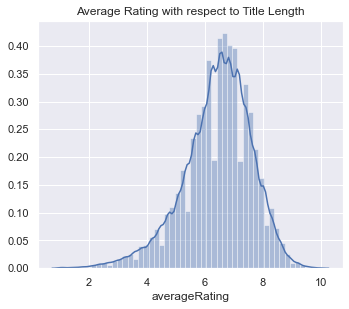

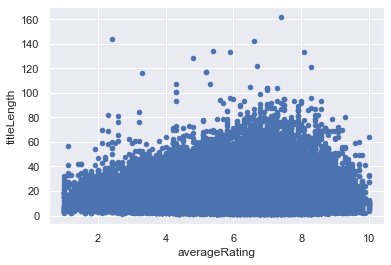

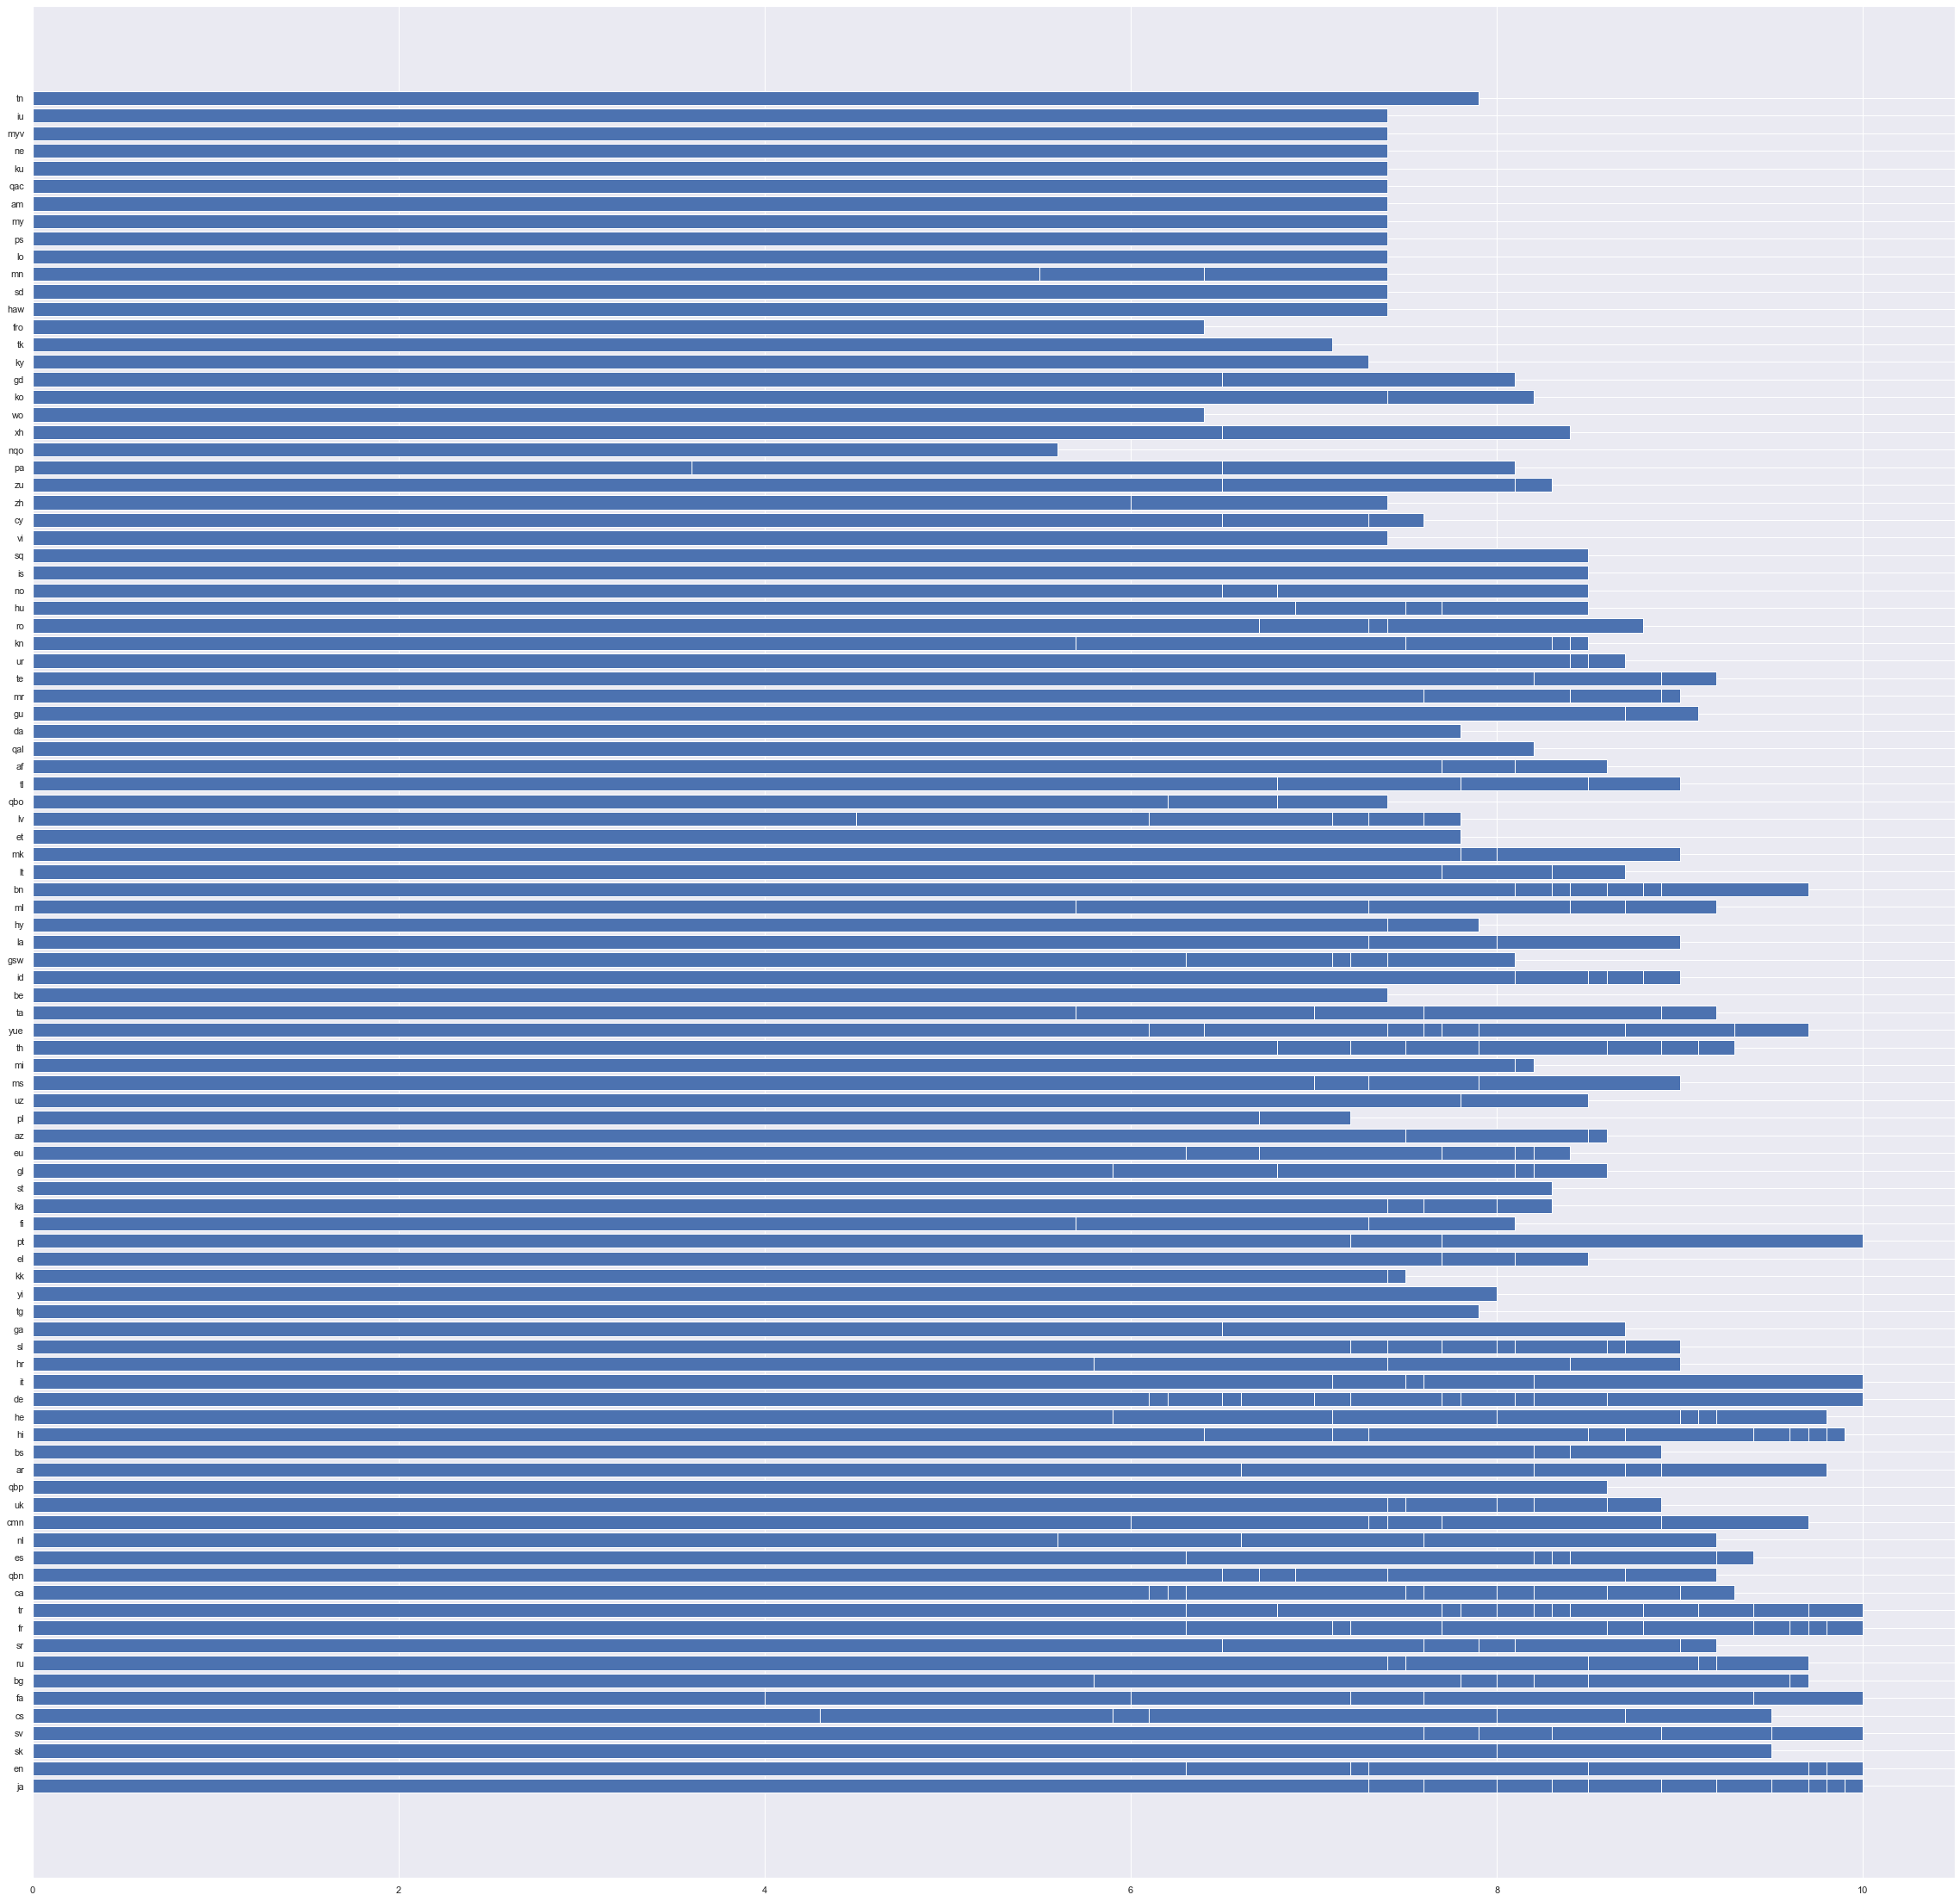

In [27]:
#Plot  a graph to see average rating w.r.t.  title length
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(merge_data[merge_data['titleLength']>0].averageRating)
plt.title('Average Rating with respect to Title Length')

# Plot scatter, line and other graph to explore data
merge_data.plot.scatter(x = 'averageRating', y = 'titleLength');

#Bar Graph to show how title length affects the rating
fig = plt.figure(figsize =(40, 40 ))
plt.barh(merge_data.language, merge_data.averageRating)
plt.show()

## Determine which language artifacts has higher rating

Top 5 Languages that have higher rating


,language,averageRating,numVotes,titleLength,language_N,region_N,Action,Adult,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,is,8.500000,978116.000000,17.00000,35.0,48.0,0.000000,0.0,1.000000,1.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,sq,8.500000,978116.000000,11.00000,75.0,1.0,0.000000,0.0,1.000000,1.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
2,tn,7.900000,70.000000,8.00000,85.0,105.0,0.000000,0.0,1.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
3,ko,7.800000,828.000000,9.00000,42.0,34.5,0.000000,0.0,0.500000,0.500000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,mr,7.582456,287988.578947,12.45614,53.0,45.0,0.263158,0.0,0.157895,0.052632,...,0.0,0.0,0.210526,0.157895,0.0,0.017544,0.0,0.087719,0.035088,0.0


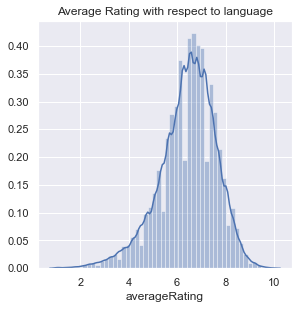

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.distplot(merge_data[merge_data['language_N']>0].averageRating)
plt.title('Average Rating with respect to language')

lang_with_high_rating = merge_data.groupby('language').mean().sort_values(['averageRating', 'numVotes'], ascending=False).reset_index()
print("Top 5 Languages that have higher rating")
lang_with_high_rating.head()

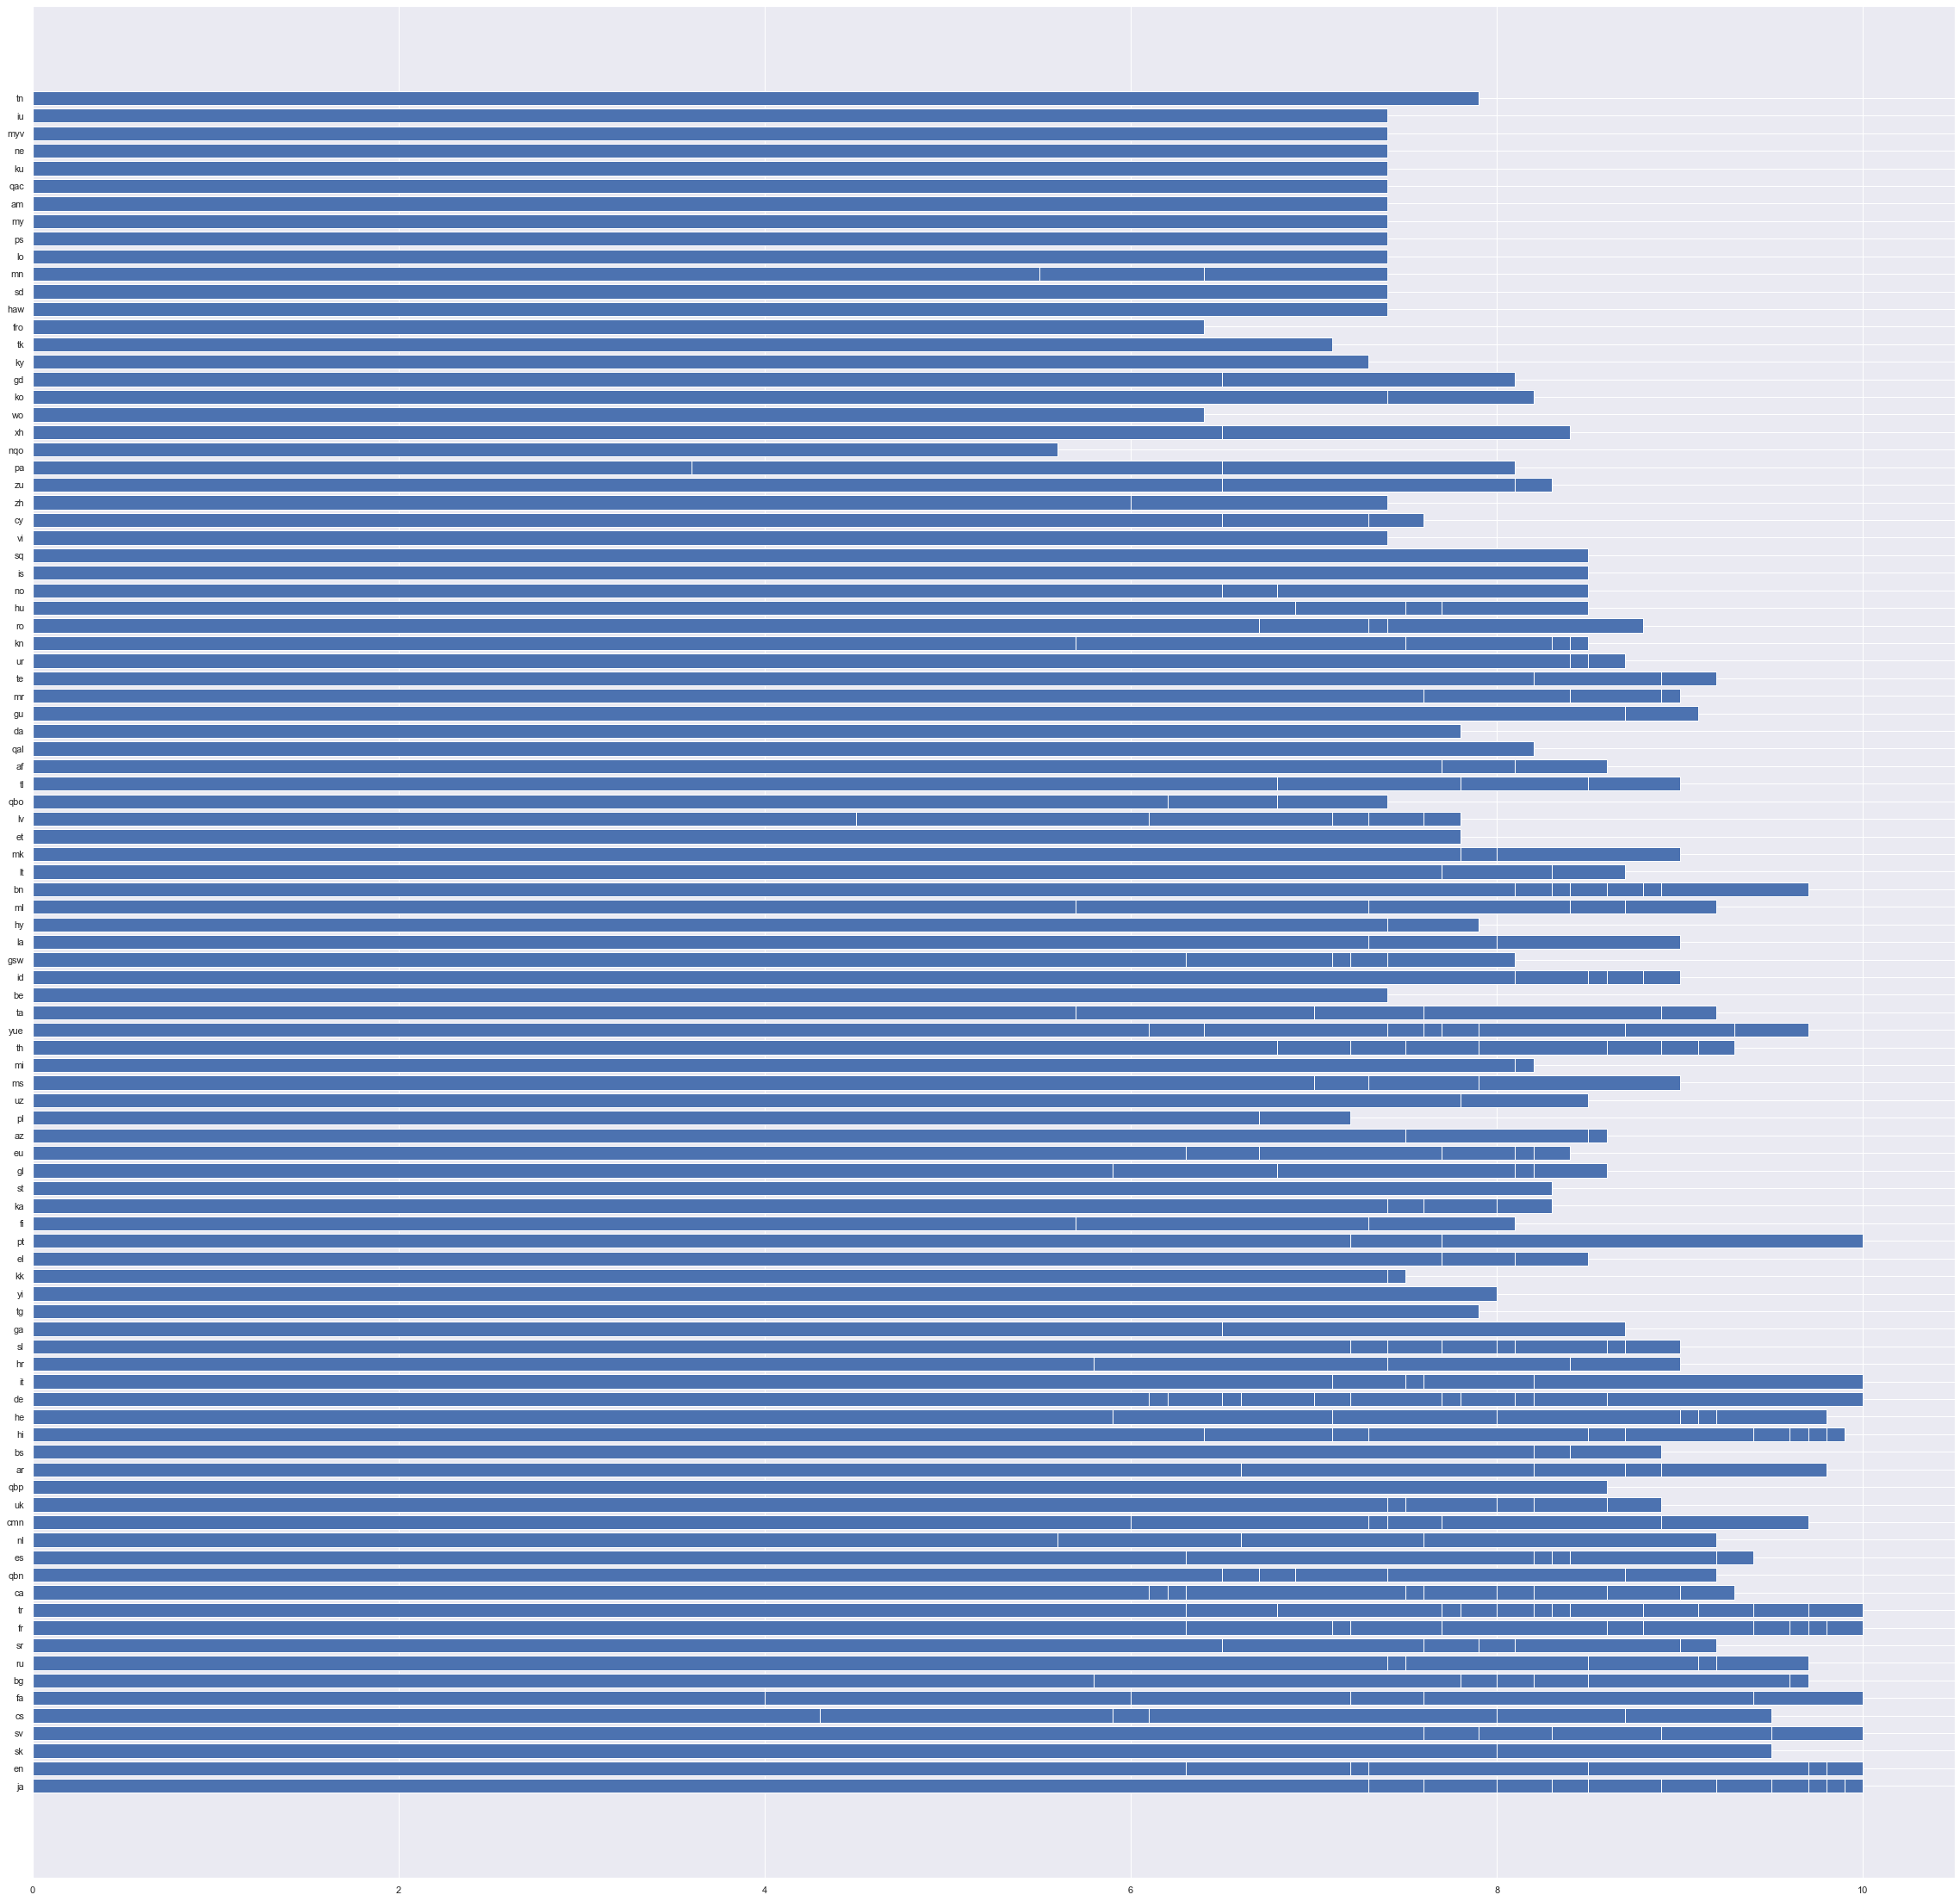

In [29]:
#Bar Graph to show which language has highest rating
fig = plt.figure(figsize =(40, 40 ))
plt.barh(merge_data.language, merge_data.averageRating)
plt.show()

## Identify the best directors and writers with highest ratings.

In [30]:
dir_grp_highest_rating = merge_data.groupby('directors').mean().sort_values(by=['averageRating', 'numVotes'], ascending=False).reset_index()
wri_grp_highest_rating = merge_data.groupby('writers').mean().sort_values(by=['averageRating', 'numVotes'], ascending=False).reset_index()

In [31]:
dir_grp_highest_rating.head()

,directors,averageRating,numVotes,titleLength,language_N,region_N,Action,Adult,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"nm11624298,nm11624300,nm11624299",10.0,1620.0,23.25,22.25,53.5,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,nm10656343,10.0,169.0,33.00,15.00,17.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,nm9445107,10.0,15.0,64.00,15.00,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,nm12615964,10.0,10.0,5.00,86.00,90.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,nm12834162,10.0,9.0,5.00,19.00,47.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
wri_grp_highest_rating.head()

,writers,averageRating,numVotes,titleLength,language_N,region_N,Action,Adult,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"nm11624298,nm11624299,nm11624300",10.0,1620.0,23.25,22.25,53.5,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,nm10656343,10.0,169.0,33.00,15.00,17.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,nm9445107,10.0,15.0,64.00,15.00,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,"nm12615965,nm12615964",10.0,10.0,5.00,86.00,90.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,"nm12834162,nm12834163",10.0,9.0,5.00,19.00,47.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
d = dir_grp_highest_rating.head()
dirList = list(d.iloc[0].directors.split(","))
d = wri_grp_highest_rating.head()
wriList = list(d.iloc[0].writers.split(","))
print("Ids of best directors:", dirList)
print("Ids of best writers:", wriList)

Ids of best directors: ['nm11624298', 'nm11624300', 'nm11624299']
Ids of best writers: ['nm11624298', 'nm11624299', 'nm11624300']


In [34]:
name_basics_df = pd.read_csv('.\\dataset\\name_basics_data.tsv',sep='\t')
name_basics_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0072308,tt0050419,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0071877,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0060827,tt0050976"


In [35]:
ser1 = name_basics_df.nconst.isin(dirList)
filtered_df1 = name_basics_df[ser1]

ser2 = name_basics_df.nconst.isin(wriList)
filtered_df2 = name_basics_df[ser2]

In [36]:
print("Name of Best directors having higest rating")
filtered_df1.primaryName.reset_index()

Name of Best directors having higest rating


,index,primaryName
0,2518335,Paulo Viníccius Santos Ferraz
1,2518336,Davi Gamer
2,2518338,Hugo Santos Ferraz


In [37]:
print("Name of Best writers having higest rating")
filtered_df2.primaryName.reset_index()

Name of Best writers having higest rating


,index,primaryName
0,2518335,Paulo Viníccius Santos Ferraz
1,2518336,Davi Gamer
2,2518338,Hugo Santos Ferraz


## Identify the region with the best ratings

In [38]:
region_best_rating = merge_data.groupby('region').mean().sort_values(by=['averageRating', 'numVotes'], ascending=False).reset_index()
region_best_rating

,region,averageRating,numVotes,titleLength,language_N,region_N,Action,Adult,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,AL,8.500000,978116.000000,11.000000,75.0,1.0,0.000000,0.0,1.000000,1.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,IS,8.500000,978116.000000,17.000000,35.0,48.0,0.000000,0.0,1.000000,1.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,UZ,8.500000,978116.000000,10.000000,89.0,94.0,0.000000,0.0,1.000000,1.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,SD,8.100000,37.000000,19.000000,2.0,80.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0
4,MK,7.800000,105.000000,21.000000,50.0,60.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,EE,6.033333,36778.333333,13.000000,17.0,30.0,0.666667,0.0,0.333333,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0
103,YE,6.000000,392828.000000,35.000000,15.0,103.0,1.000000,0.0,1.000000,0.000000,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0
104,AU,5.942857,11107.000000,15.857143,15.0,5.0,0.285714,0.0,0.285714,0.142857,...,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.000000,0.0,0.0
105,AF,5.850000,9665.000000,15.500000,15.0,0.0,0.500000,0.0,0.500000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.500000,0.0,0.0


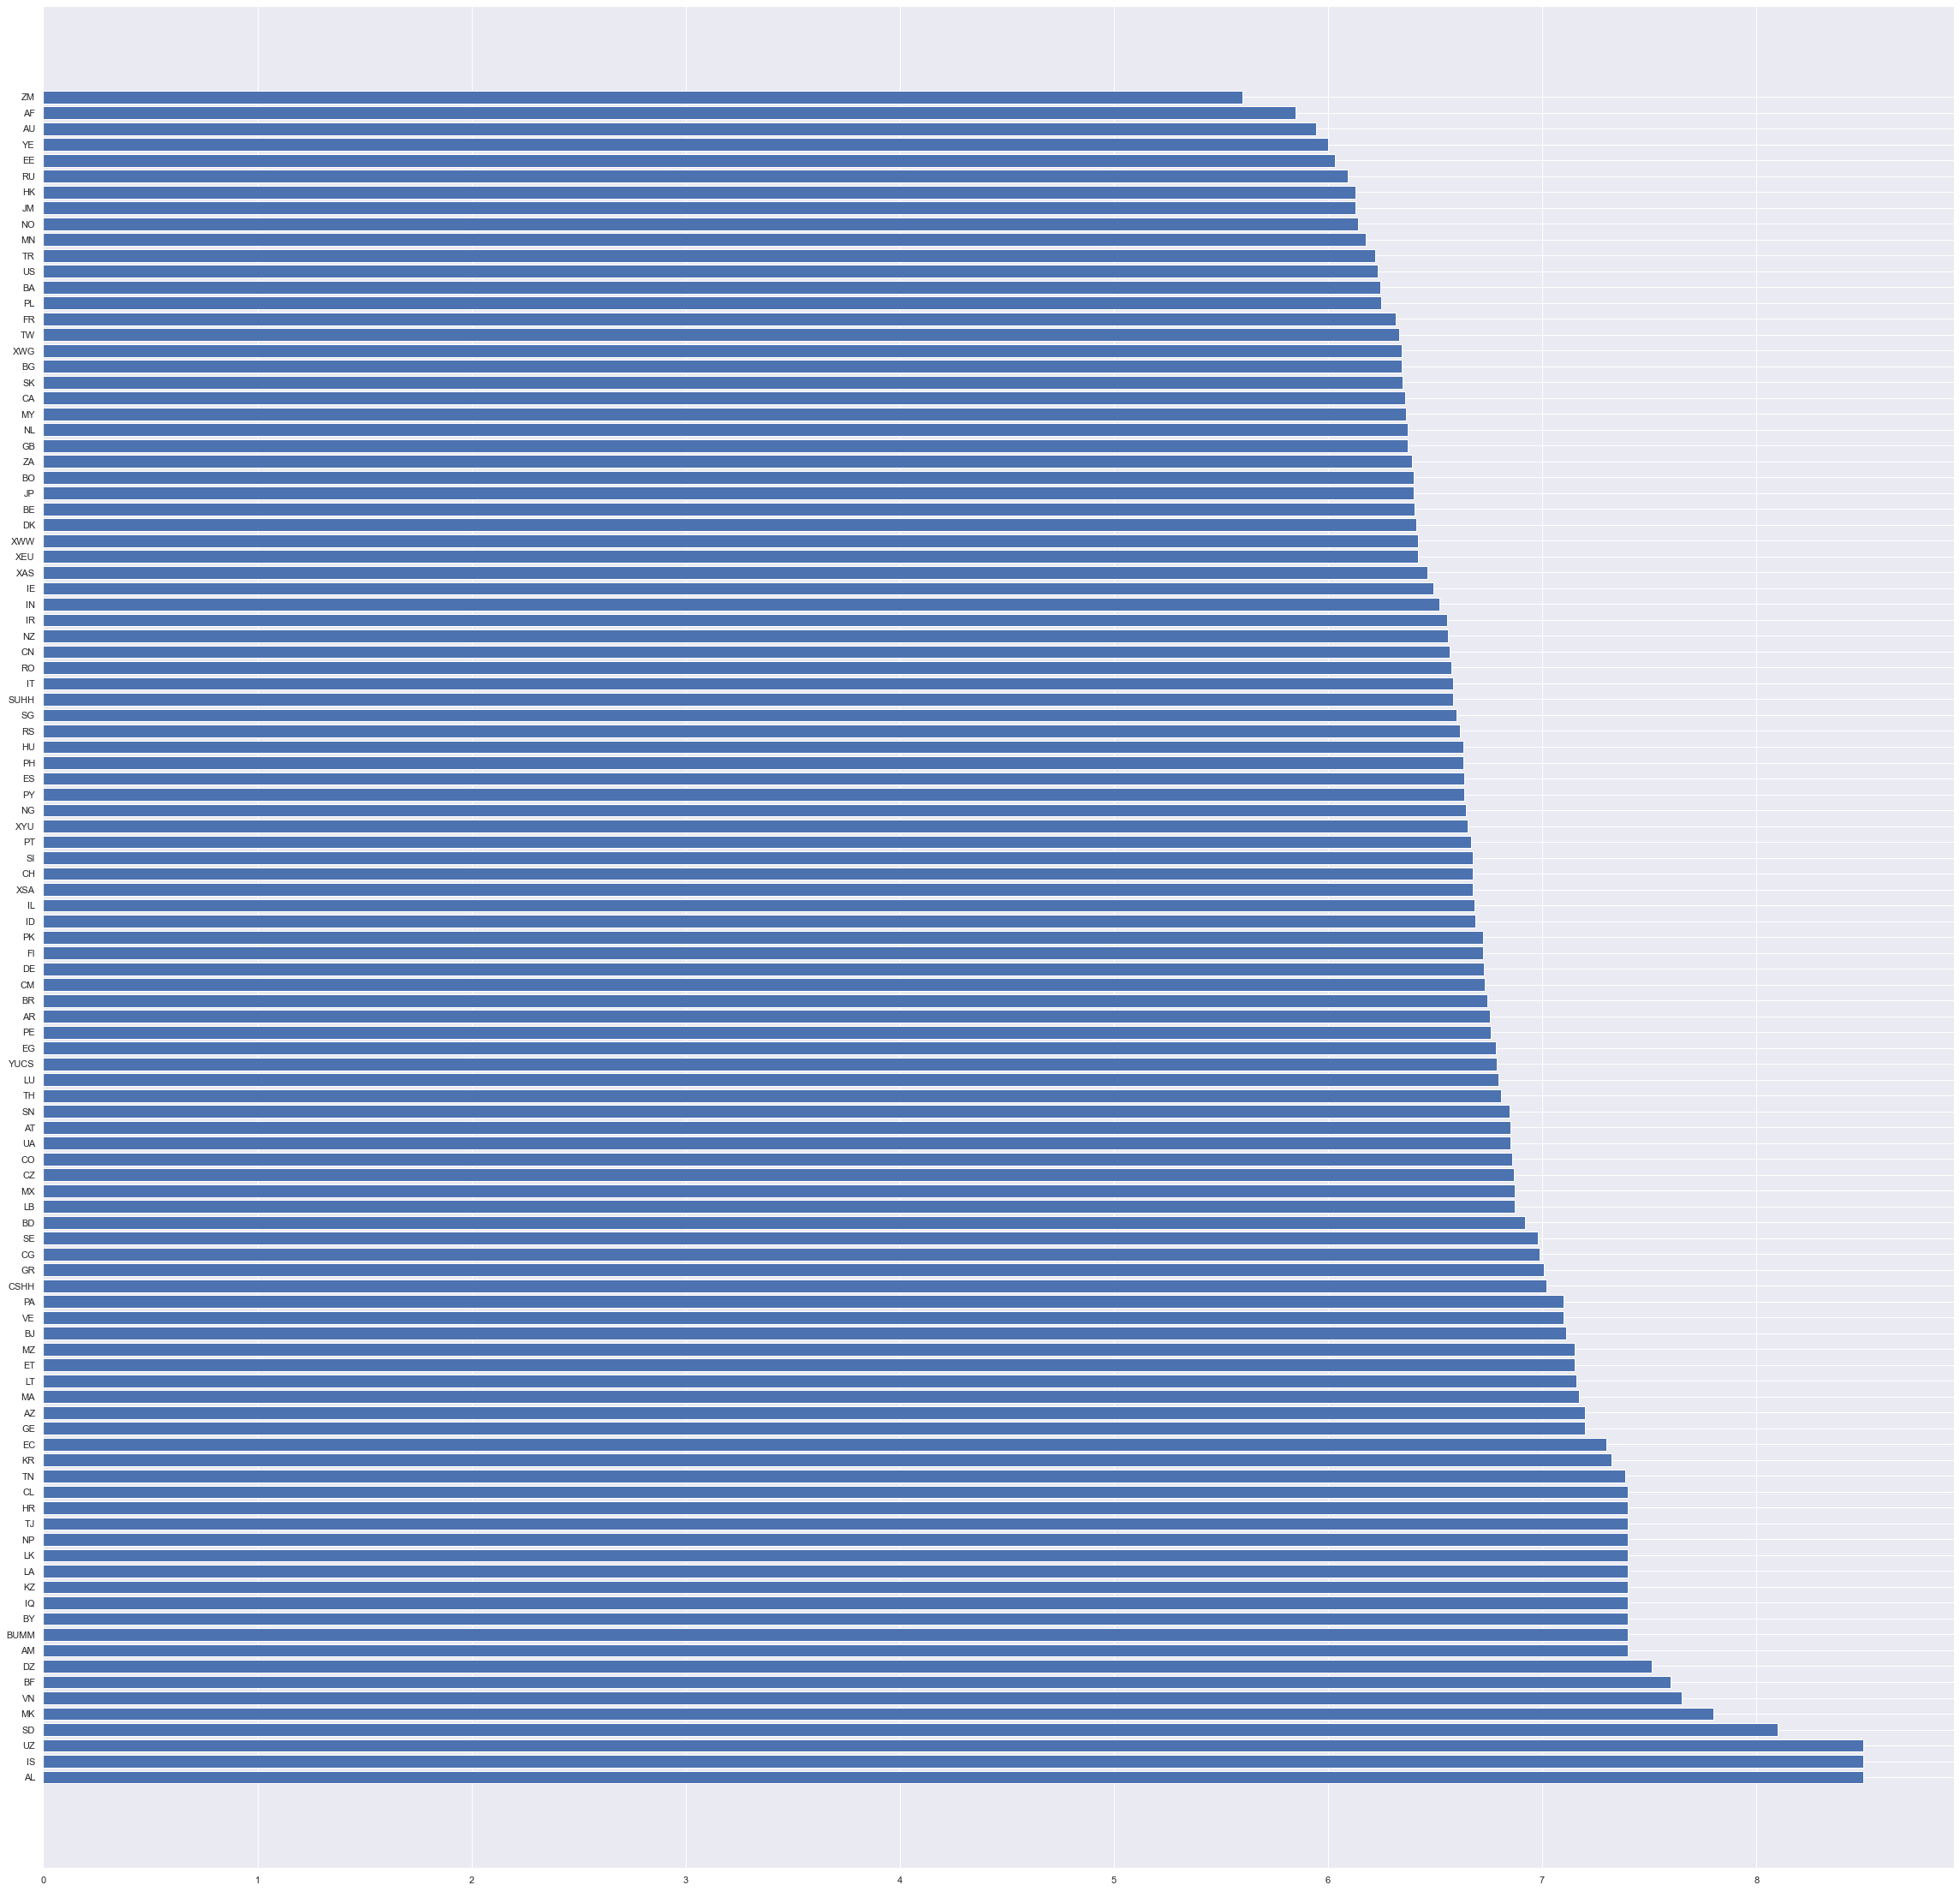

In [39]:
#Bar Graph to show which language has highest rating
fig = plt.figure(figsize =(40, 40 ))
plt.barh(region_best_rating.region, region_best_rating.averageRating)
plt.show()

## Analyze how the title length varied with years

In [40]:
title_len_by_years = merge_data.groupby('startYear').mean().sort_values(by=['titleLength'], ascending=False).reset_index()
title_len_by_years.head(10)

,startYear,averageRating,numVotes,titleLength,language_N,region_N,Action,Adult,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1904,5.500000,64.000000,61.000000,15.000000,51.000000,0.000000,0.0,1.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0
1,1898,5.600000,378.333333,29.666667,15.000000,101.000000,0.000000,0.0,0.000000,0.000000,...,0.333333,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0
2,2020,6.300000,147.000000,28.500000,12.000000,70.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
3,1912,6.006667,141.800000,25.200000,54.066667,45.933333,0.000000,0.0,0.066667,0.066667,...,0.000000,0.0,0.000000,0.066667,0.466667,0.0,0.0,0.000000,0.066667,0.0
4,1913,6.044444,61.111111,24.888889,43.166667,55.333333,0.055556,0.0,0.055556,0.000000,...,0.000000,0.0,0.111111,0.000000,0.611111,0.0,0.0,0.055556,0.000000,0.0
5,1910,6.090000,31.300000,23.300000,71.700000,40.700000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0
6,1914,5.812500,38.250000,23.125000,71.125000,49.375000,0.000000,0.0,0.250000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.500000,0.0,0.0,0.000000,0.000000,0.0
7,1978,5.600000,329.000000,23.000000,22.500000,73.000000,1.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
8,1896,4.950000,1643.000000,23.000000,29.500000,43.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.500000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0
9,1905,6.150000,130.750000,22.750000,15.000000,71.500000,0.000000,0.0,0.250000,0.000000,...,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0


In [41]:
merge_data.startYear.nunique()

212

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'How the title length varied with years')

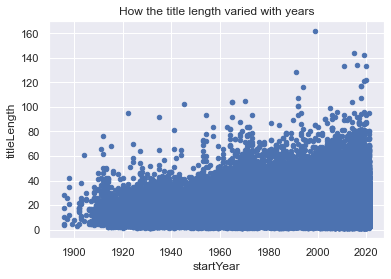

In [42]:
# Plot scatter, line and other graph to explore data
merge_data.plot.scatter(x = 'startYear', y = 'titleLength');
plt.title('How the title length varied with years')

In [43]:
# #Bar Graph to show which language has highest rating
# fig = plt.figure(figsize =(15, 10))
# plt.barh(title_len_by_years.startYear, title_len_by_years.averageRating)
# plt.show()

## Identify the best crew that gave the best of releases.

In [44]:
best_crew_of_release = merge_data.groupby(['directors','writers']).mean().sort_values(by=['averageRating','numVotes'], ascending=False).reset_index()
best_crew_of_release.head(10)

,directors,writers,averageRating,numVotes,titleLength,language_N,region_N,Action,Adult,Adventure,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"nm11624298,nm11624300,nm11624299","nm11624298,nm11624299,nm11624300",10.0,1620.0,23.250000,22.250000,53.500000,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,nm10656343,nm10656343,10.0,169.0,33.000000,15.000000,17.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,nm9445107,nm9445107,10.0,15.0,64.000000,15.000000,17.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,nm12615964,"nm12615965,nm12615964",10.0,10.0,5.000000,86.000000,90.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,nm12834162,"nm12834162,nm12834163",10.0,9.0,5.000000,19.000000,47.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,nm10693228,nm10693229,10.0,8.0,5.000000,15.000000,101.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,nm1636694,"nm1636694,nm0001969",10.0,7.0,9.142857,33.714286,47.142857,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,nm2918300,"nm2918300,nm2991889,nm3968748",10.0,7.0,13.000000,15.000000,45.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,nm0814613,nm0814613,10.0,6.0,4.000000,15.000000,45.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,nm12616456,nm12616459,10.0,6.0,10.000000,15.000000,31.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [45]:
d = best_crew_of_release.head()
list(d.writers[0].split(","))

['nm11624298', 'nm11624299', 'nm11624300']

In [46]:
d = best_crew_of_release.head()
dirList = list(d.iloc[0].directors.split(","))
wriList = list(d.writers[0].split(","))
li = set(dirList + wriList)
print("Ids of best crew directors:", dirList)
print("Ids of best crew writers:", wriList)

Ids of best crew directors: ['nm11624298', 'nm11624300', 'nm11624299']
Ids of best crew writers: ['nm11624298', 'nm11624299', 'nm11624300']


In [47]:
s = name_basics_df.nconst.isin(list(li))
filterdf = name_basics_df[s]
print("The best crew that gave the best of releases")
filterdf

The best crew that gave the best of releases


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
2518335,nm11624298,Paulo Viníccius Santos Ferraz,1993,\N,"actor,director,producer",tt12423408
2518336,nm11624299,Davi Gamer,\N,\N,"writer,actor,producer",tt12423408
2518338,nm11624300,Hugo Santos Ferraz,\N,\N,"actor,producer,writer",tt12423408


## Which type of genre attracts more users. Analyze the genre that was most popular.

In [48]:
best_genre_by_users = merge_data.groupby('genres_N').mean().sort_values(by=['numVotes'], ascending=False).reset_index()
best_genre_by_users.head(10)

,genres_N,averageRating,numVotes,titleLength,language_N,region_N,Action,Adult,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0010100000000000000010,7.931034,378577.827586,17.827586,37.310345,47.931034,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1000000000000000010000,6.567568,252825.243243,15.972973,27.837838,46.054054,0.297297,0.000000,0.027027,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0010000000010000000010,7.451724,180832.500000,13.000000,35.948276,58.275862,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0010000010100000000000,6.963158,167776.947368,23.210526,27.842105,41.473684,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1010000000000001000000,6.913158,158241.815789,13.236842,28.513158,40.250000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0000000000000001000000,6.041769,145833.246935,17.125438,30.985771,48.159370,0.637697,0.001751,0.487960,0.134632,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0000000000000011000100,6.034783,110742.260870,11.782609,23.391304,41.521739,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0010000100100000000000,7.120588,106412.647059,17.235294,28.735294,44.205882,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0010000000000011000000,6.723704,106341.762963,13.355556,29.170370,45.425926,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0010000000010001000000,6.810445,103100.415861,11.187621,26.878143,39.535783,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


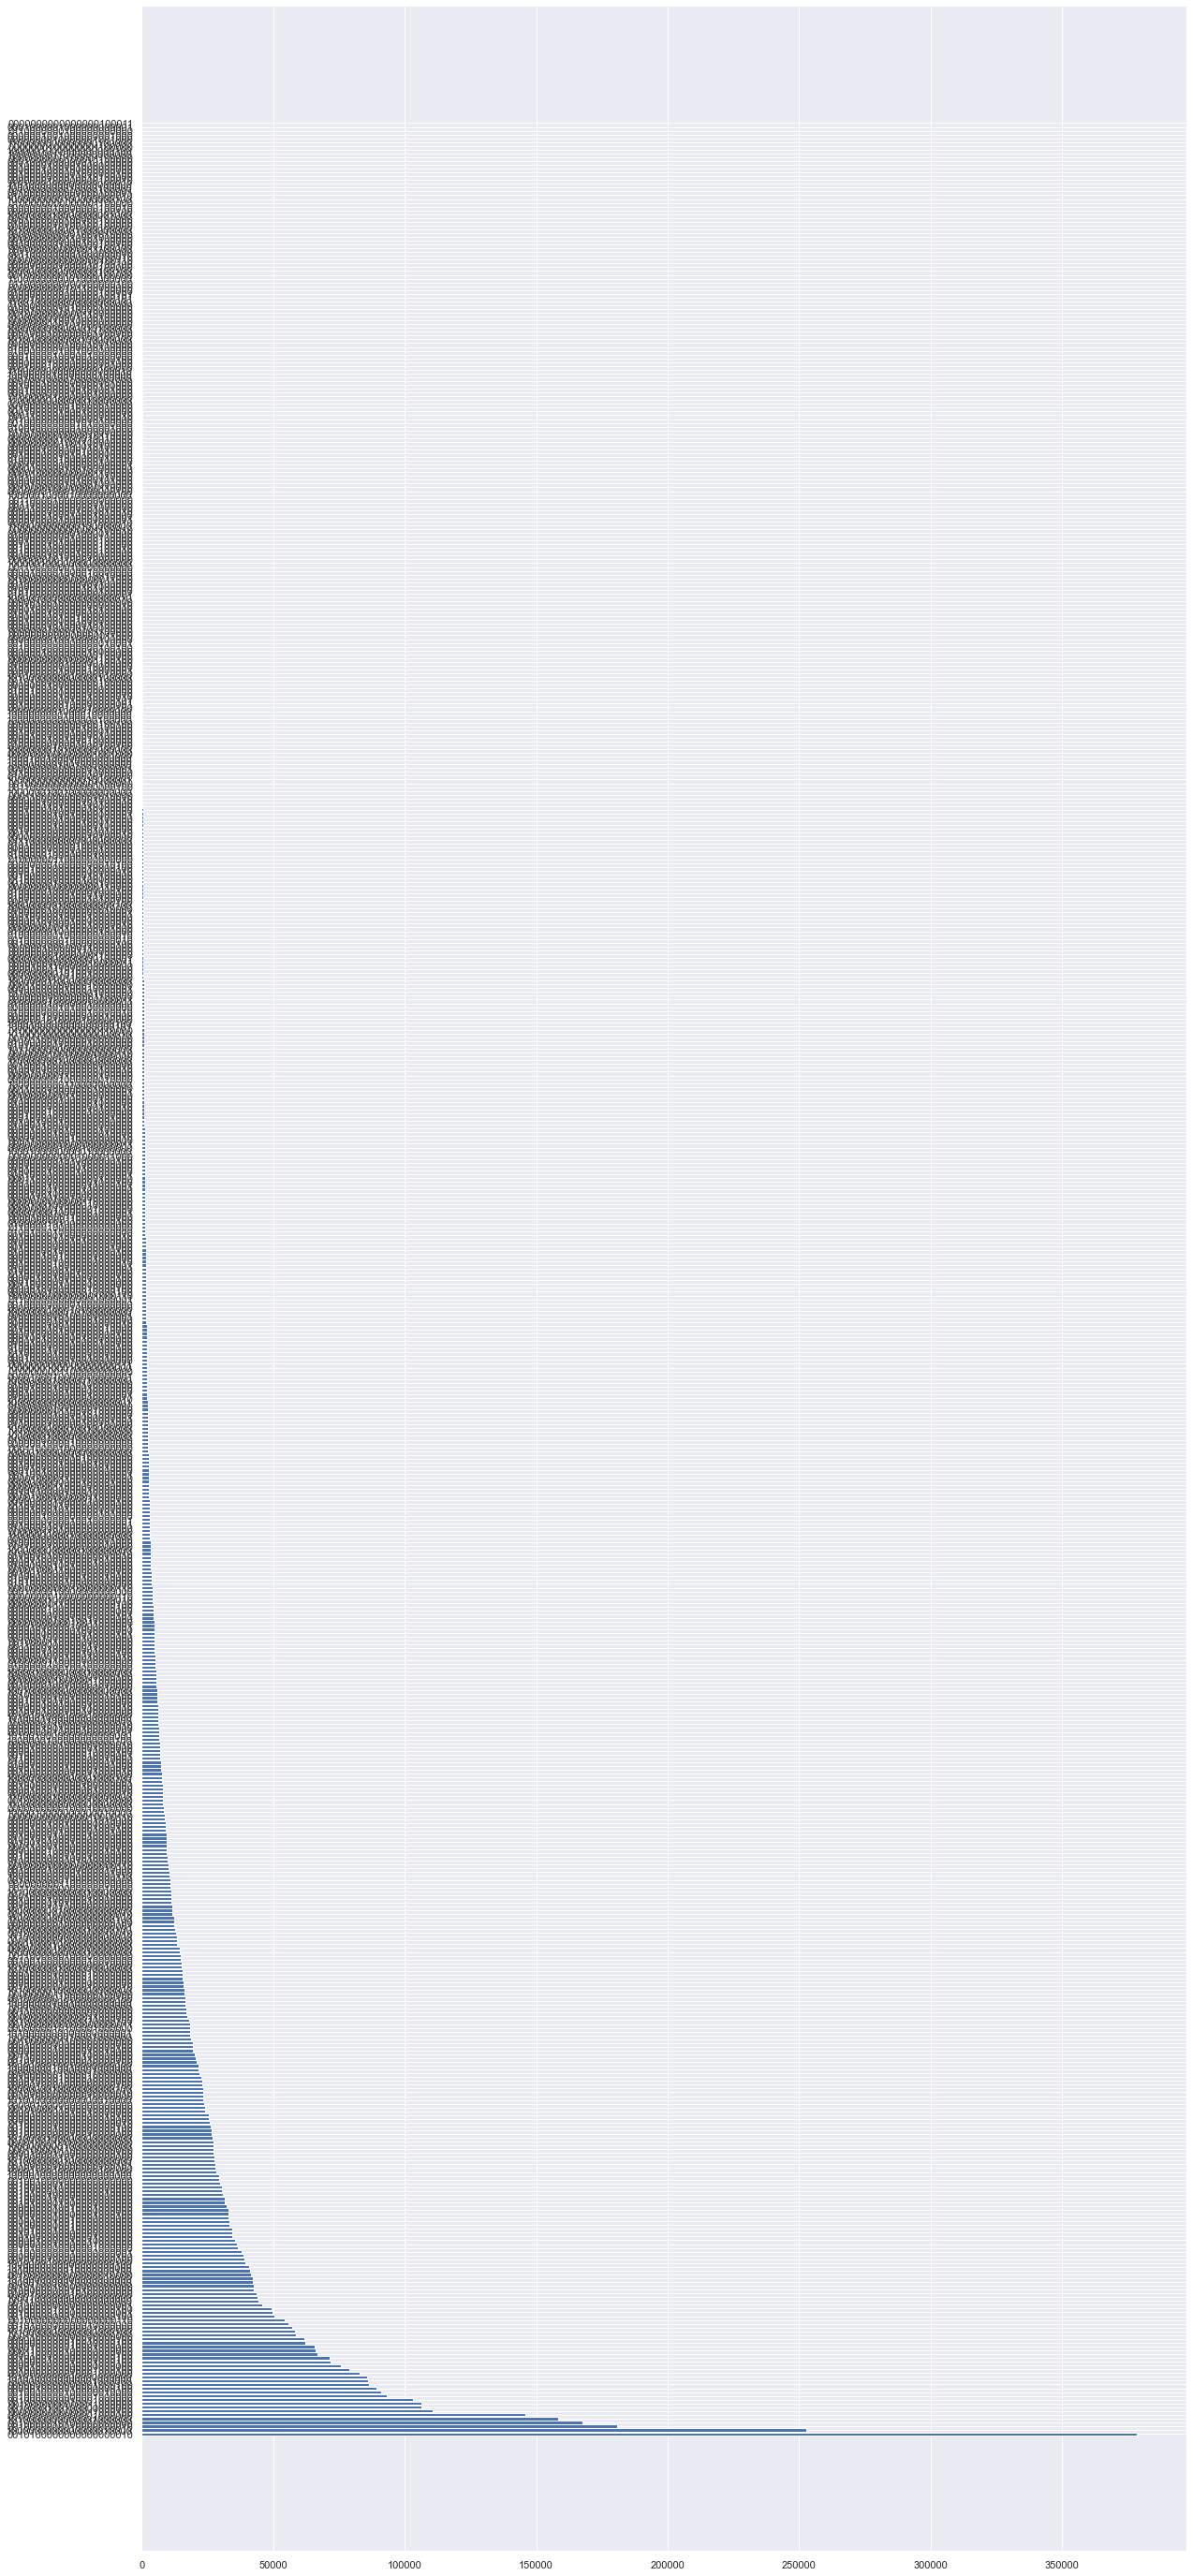

In [49]:
#Graph to show Which type of genre attracts more users
fig = plt.figure(figsize =(20, 50))
plt.barh(best_genre_by_users.genres_N, best_genre_by_users.numVotes)
plt.show()

# ===================== 

## Data Review & Preparation for Modelling

In [50]:
#Exploring columns in merged data
merge_data.columns

Index(['titleId', 'title', 'region', 'language', 'types', 'isOriginalTitle',
       'titleType', 'startYear', 'averageRating', 'numVotes', 'directors',
       'writers', 'titleLength', 'language_N', 'region_N', 'Action', 'Adult',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
       'Western', 'genres_N'],
      dtype='object')

In [51]:
merge_data.head()

,titleId,title,region,language,types,isOriginalTitle,titleType,startYear,averageRating,numVotes,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,genres_N
524,tt0000091,悪魔の館,JP,ja,imdbDisplay,0,short,1896,6.7,3166,...,0,0,0,1,0,0,0,0,0,0000000010000000100000
656,tt0000132,Card Party,XWW,en,imdbDisplay,0,short,1896,5.1,976,...,0,0,0,1,0,0,0,0,0,0000000000000000100000
658,tt0000132,カード遊び,JP,ja,imdbDisplay,0,short,1896,5.1,976,...,0,0,0,1,0,0,0,0,0,0000000000000000100000
864,tt0000211,The Moon at One Meter,XWW,en,imdbDisplay,0,short,1898,7.5,3804,...,0,0,0,0,0,0,0,0,0,0000100010000000000000
924,tt0000230,シンデレラ,JP,ja,imdbDisplay,0,short,1899,6.5,1497,...,0,0,0,0,0,0,0,0,0,0011100000000000000000


In [52]:
# counting unique values of types
print("counting unique values of types:", len(pd.unique(merge_data['types'])))

# counting unique values of titleType
print("counting unique values of titleType:", len(pd.unique(merge_data['titleType'])))

counting unique values of types: 18
counting unique values of titleType: 10


In [53]:
#Perform Label encoding for types feature 
labelEncoder = LabelEncoder()

#Assign numeric value to types column and store in another column by adding new col
merge_data['types_N'] = labelEncoder.fit_transform(merge_data['types'])

# counting unique values of types_N
print("counting unique values of types_N:", len(pd.unique(merge_data['types_N'])))

#Assign numeric value to titleType column and store in another column by adding new col
merge_data['titleType_N'] = labelEncoder.fit_transform(merge_data['titleType'])

# counting unique values of titleType_N
print("counting unique values of titleType_N:", len(pd.unique(merge_data['titleType_N'])))

merge_data.types.unique(),merge_data.types_N.unique(),merge_data.titleType_N.unique(),merge_data.titleType_N.unique()


counting unique values of types_N: 18
counting unique values of titleType_N: 10


(array(['imdbDisplay', 'alternative', 'tv', 'dvd', 'working', 'festival',
        'imdbDisplay,tv', 'video', 'alternative,tv', 'imdbDisplay,working',
        'festival,imdbDisplay', 'imdbDisplay,video', 'alternative,dvd',
        'dvd,imdbDisplay', 'alternative,working', 'alternative,video',
        'alternative,festival', 'original'], dtype=object),
 array([10,  0, 15,  6, 17,  8, 11, 16,  3, 13,  9, 12,  1,  7,  5,  4,  2,
        14]),
 array([1, 0, 5, 2, 4, 3, 6, 8, 7, 9]),
 array([1, 0, 5, 2, 4, 3, 6, 8, 7, 9]))

In [54]:
#Exploring columns in merged data
merge_data.columns

Index(['titleId', 'title', 'region', 'language', 'types', 'isOriginalTitle',
       'titleType', 'startYear', 'averageRating', 'numVotes', 'directors',
       'writers', 'titleLength', 'language_N', 'region_N', 'Action', 'Adult',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
       'Western', 'genres_N', 'types_N', 'titleType_N'],
      dtype='object')

In [55]:
#Function to prepare a set of highly correlated independent feature
def getCorrelatedFeature(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [56]:
corr_features = getCorrelatedFeature(merge_data, 0.70)
len(set(corr_features)), corr_features

(0, set())

In [57]:
#features taken into account to perform modelling
modelling_df = merge_data[['types', 'isOriginalTitle',
       'titleType', 'startYear', 'numVotes', 'titleLength', 'language_N', 'region_N', 'Action', 'Adult',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
       'Western','averageRating']].reset_index()

In [58]:
#Performed one hot encoding on below features
modelling_df = pd.concat([modelling_df.drop('types', 1), modelling_df['types'].str.get_dummies(sep=",")], 1)
modelling_df = pd.concat([modelling_df.drop('titleType', 1), modelling_df['titleType'].str.get_dummies(sep=",")], 1)

In [59]:
# modelling_df = modelling_df.reset_index()
modelling_df = modelling_df.drop('index', axis=1)

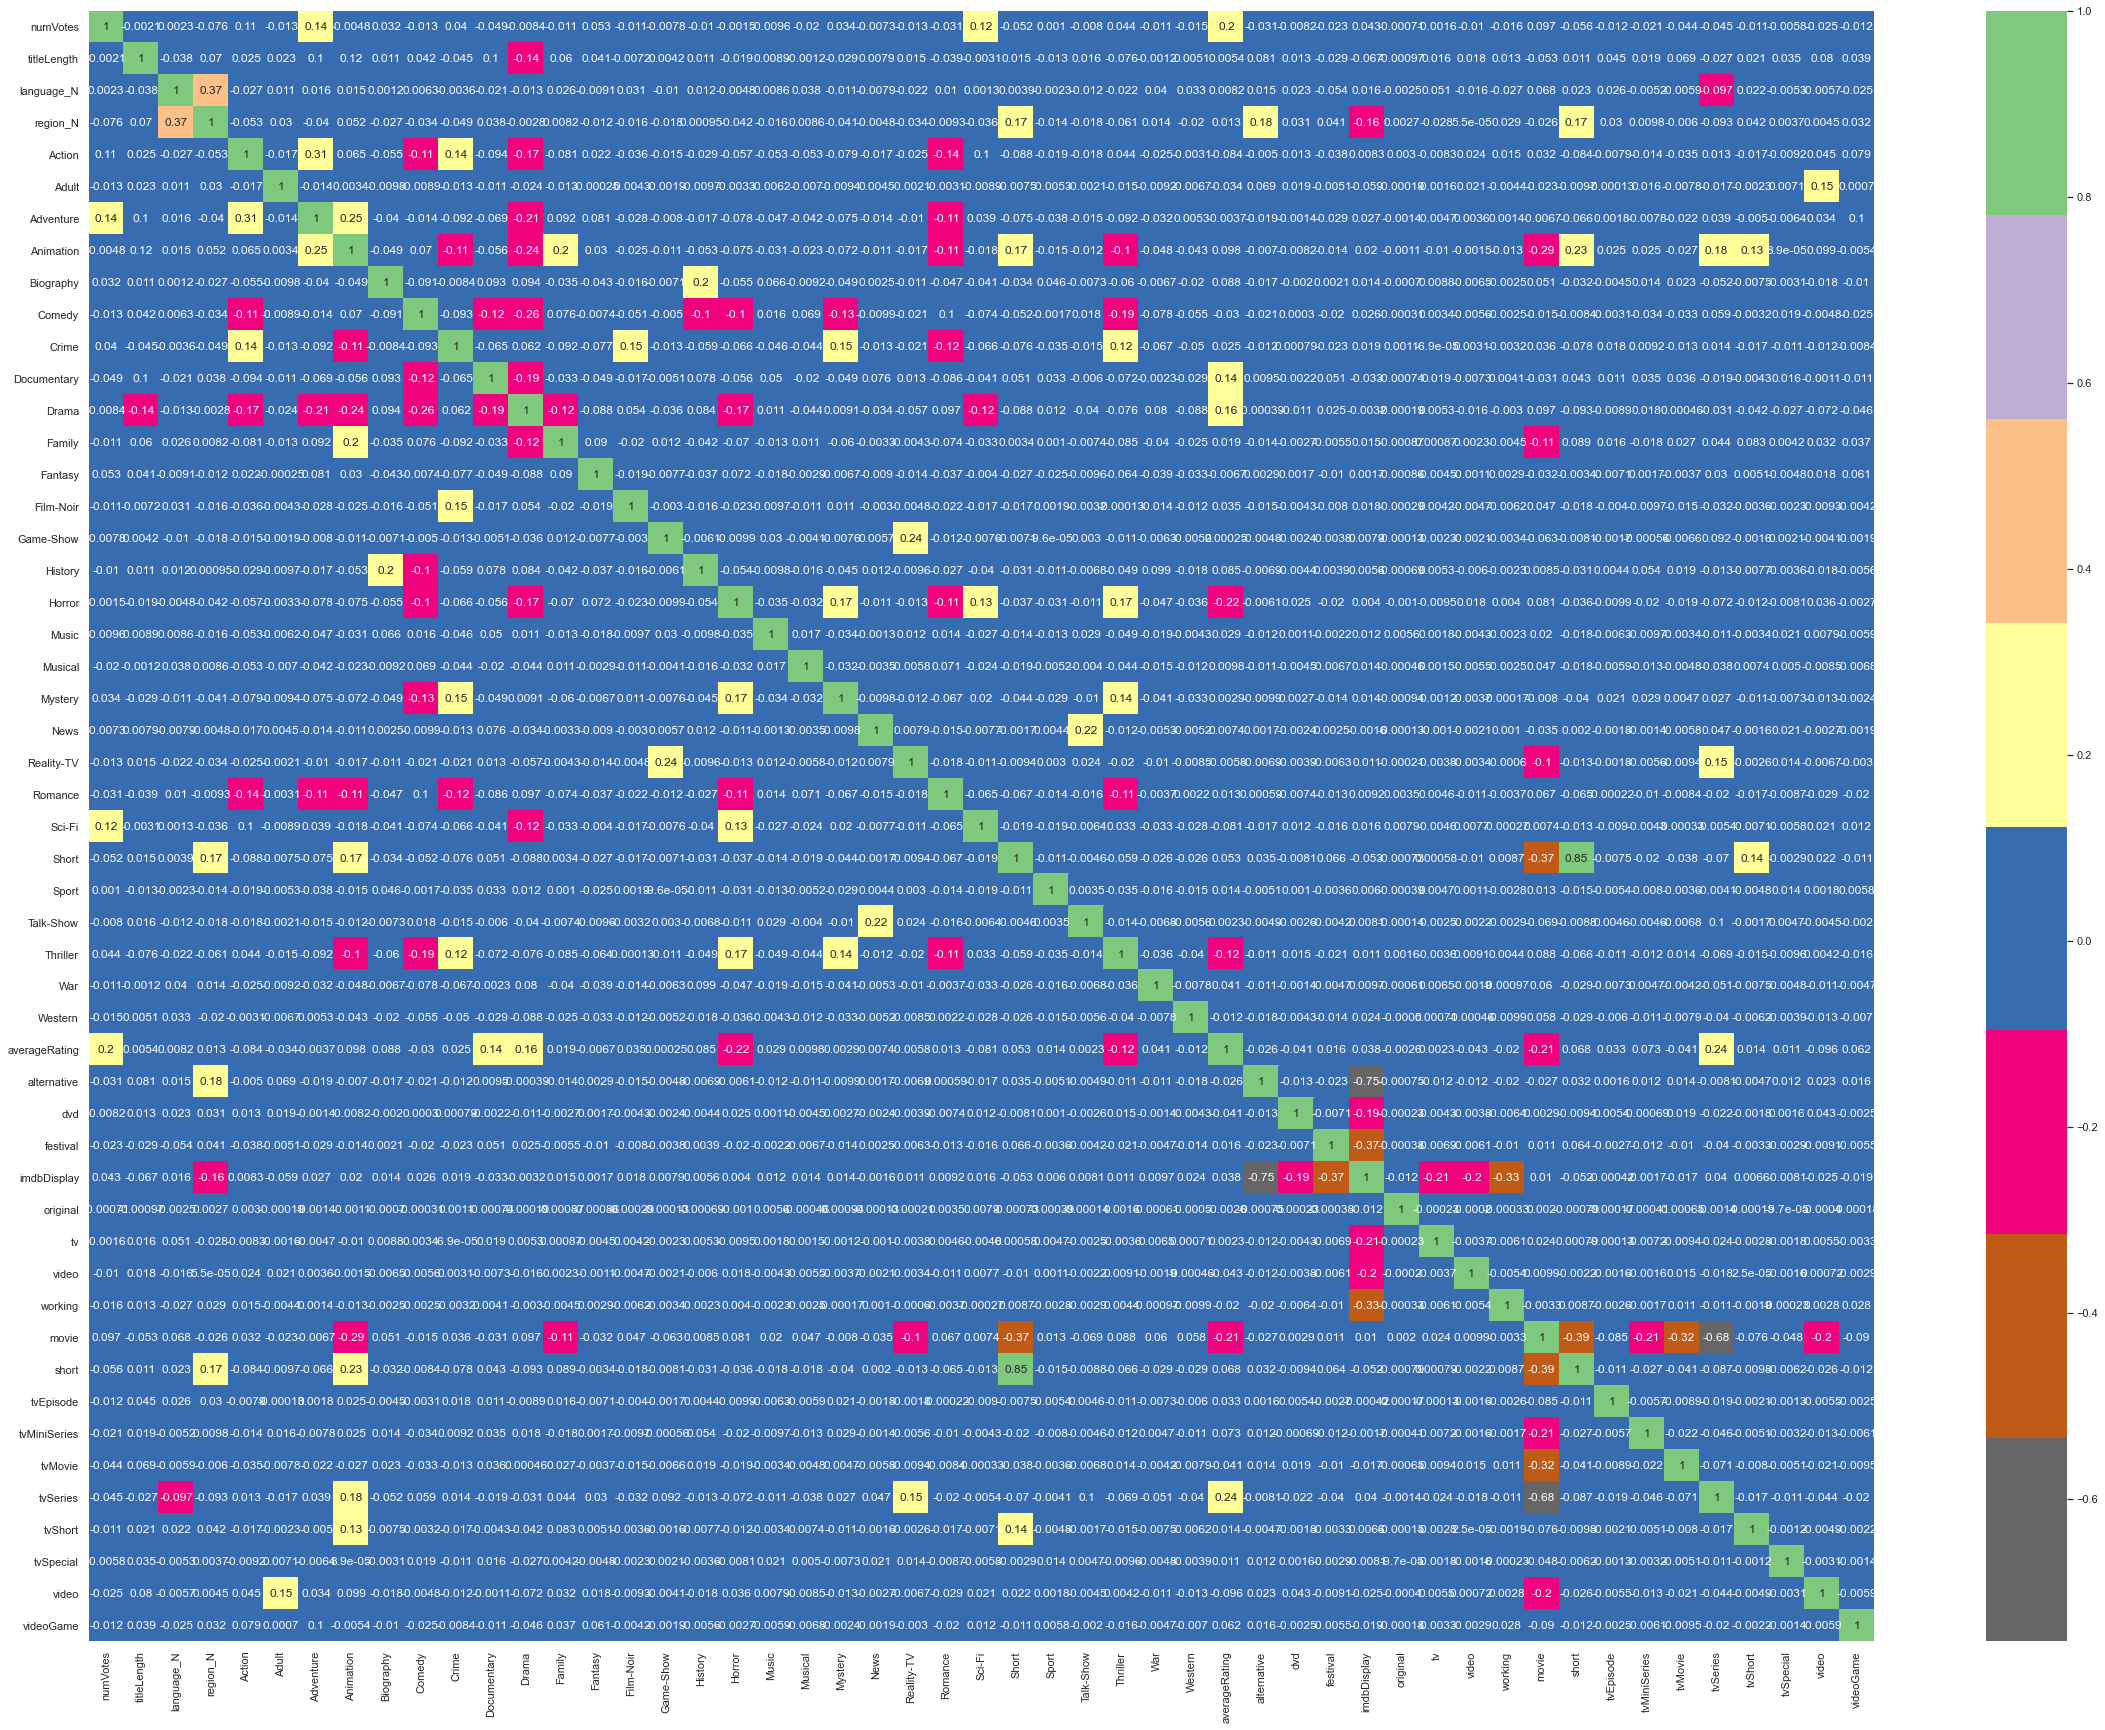

In [60]:
plt.figure(figsize=(40,30))
cor = modelling_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent_r)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3F8B462E0>,
      dtype=object)

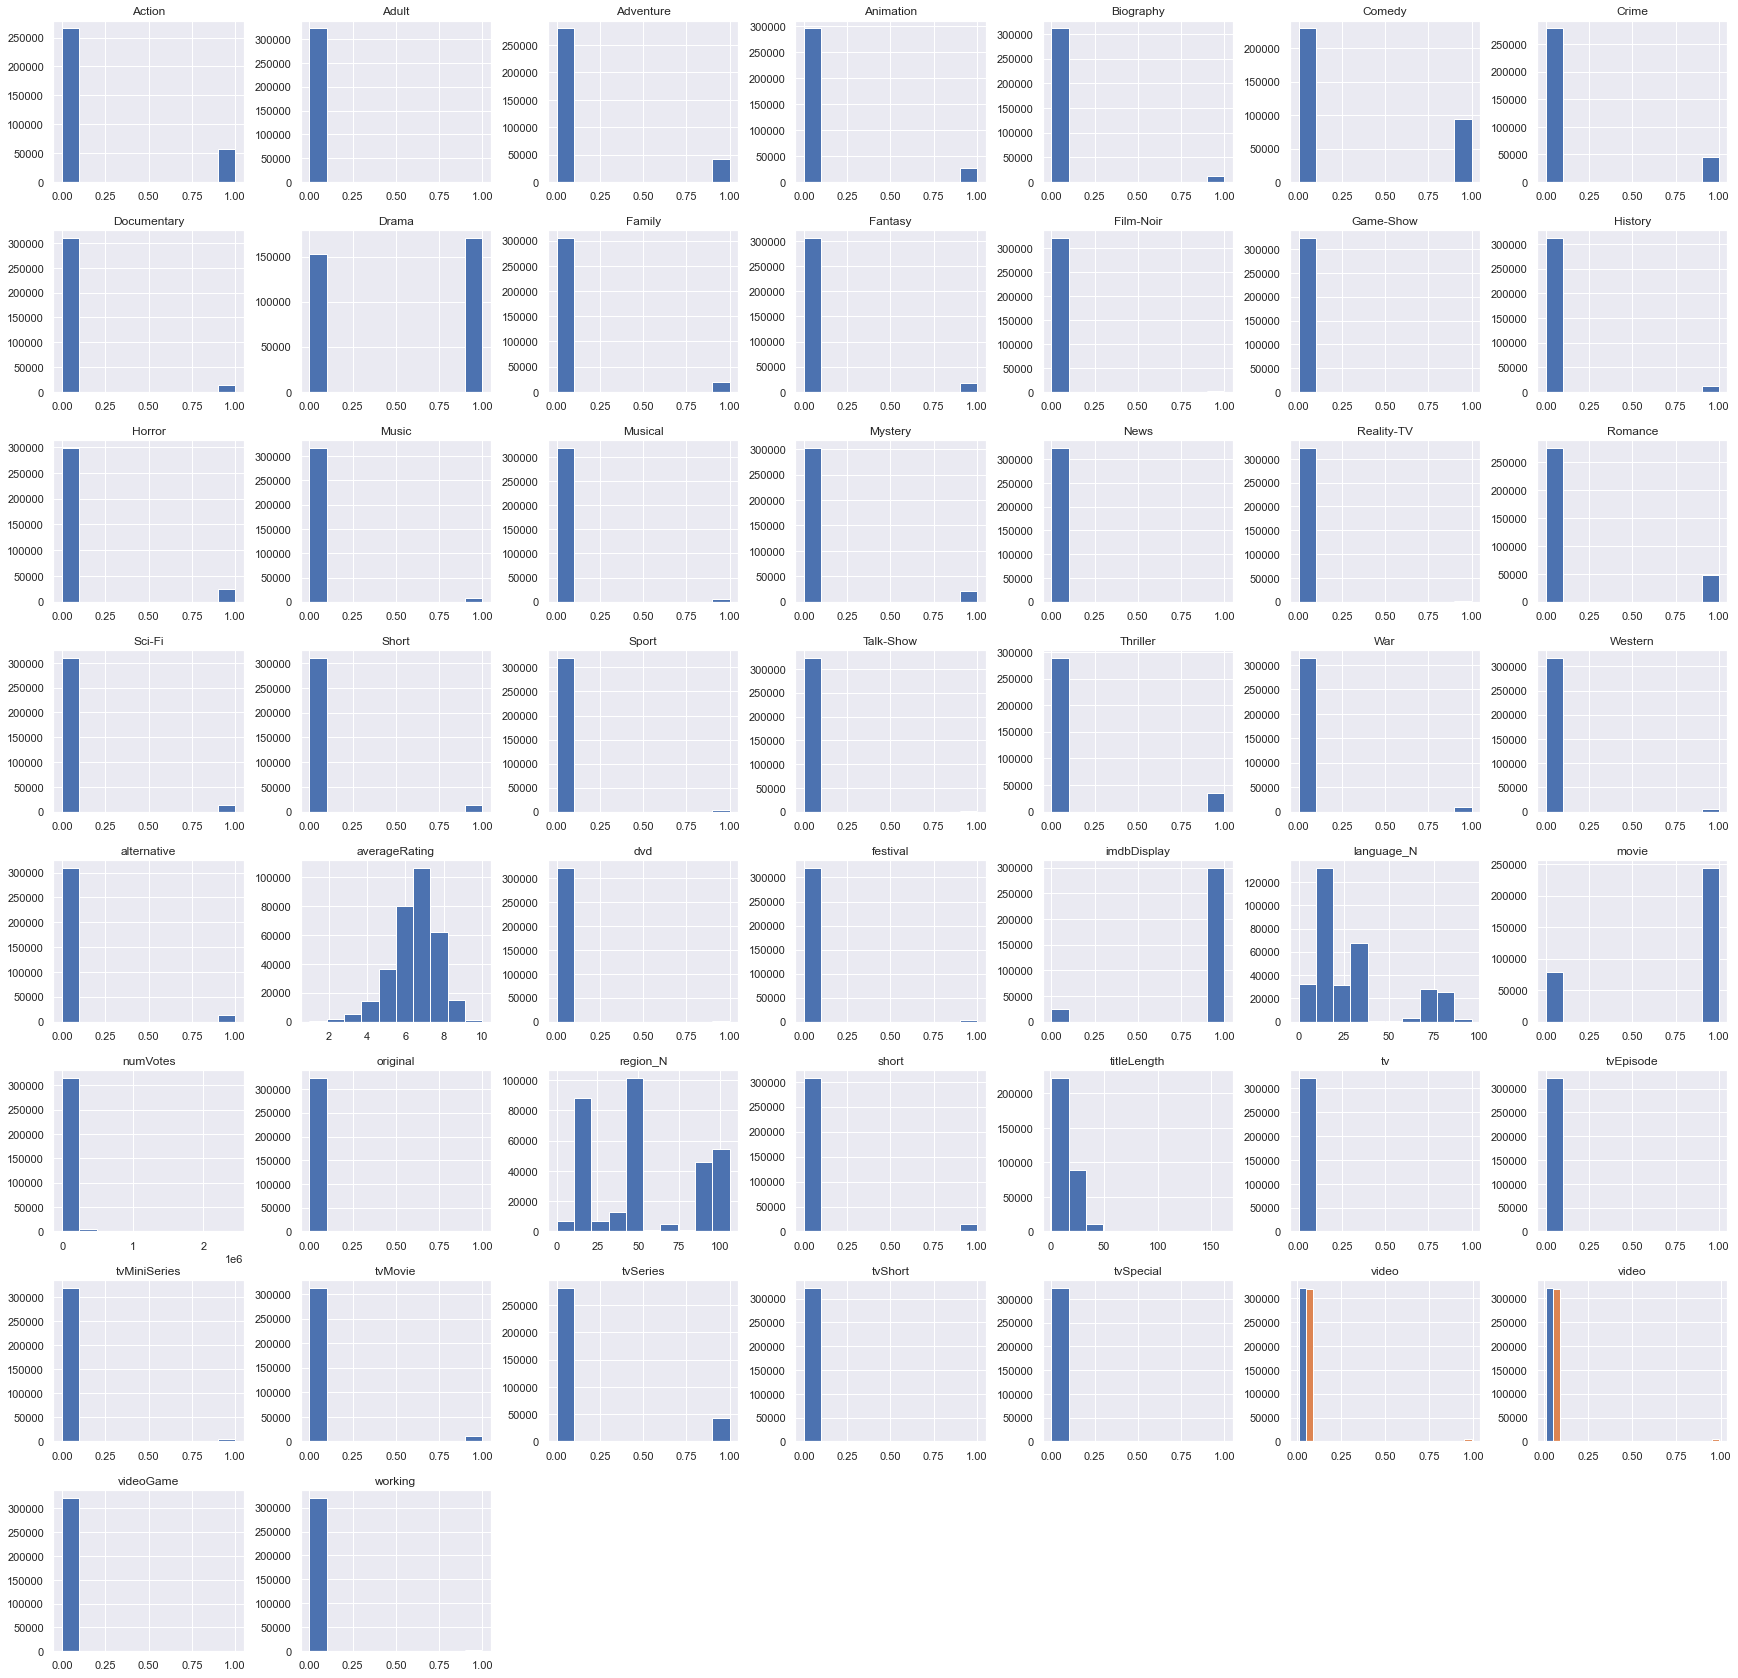

In [61]:
#Data review which is prepared for modelling
modelling_df.hist(figsize=(30,30))

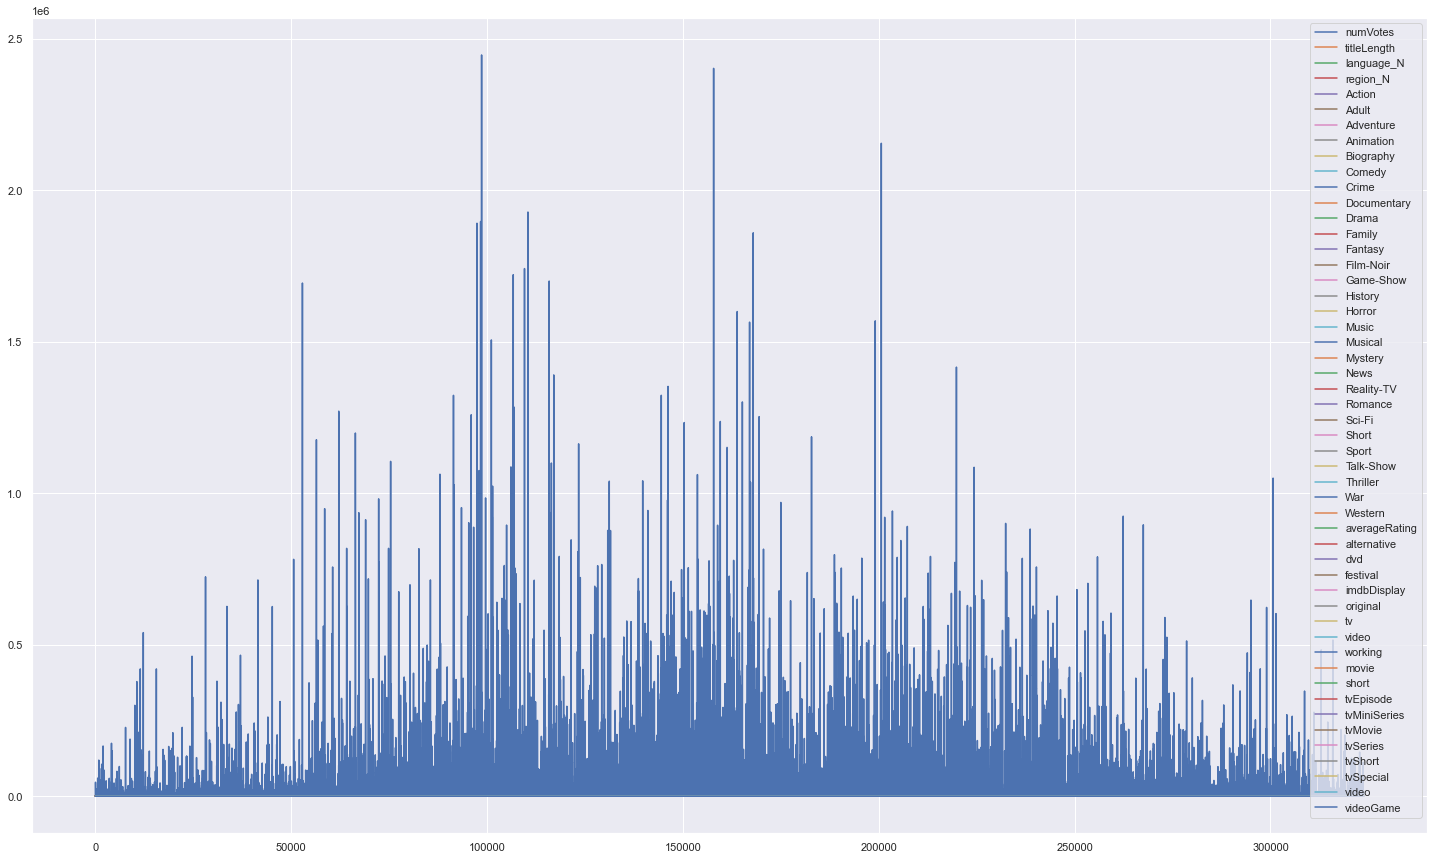

In [62]:
#Data Scale visual
modelling_df.plot(figsize=(25, 15))

In [63]:
#invar1 & invar2 Contains all the features required in modelling except target variable
invar1 = modelling_df.columns.tolist()
invar2 = modelling_df.columns.tolist()
invar1.remove('averageRating')
invar2.remove('numVotes')

In [64]:
#Check x data set to be used for modelling w.r.t. average rating
print(invar1)

['isOriginalTitle', 'startYear', 'numVotes', 'titleLength', 'language_N', 'region_N', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western', 'alternative', 'dvd', 'festival', 'imdbDisplay', 'original', 'tv', 'video', 'working', 'movie', 'short', 'tvEpisode', 'tvMiniSeries', 'tvMovie', 'tvSeries', 'tvShort', 'tvSpecial', 'video', 'videoGame']


In [65]:
#Check x data set to be used for modelling w.r.t. numVotes 
print(invar2)

['isOriginalTitle', 'startYear', 'titleLength', 'language_N', 'region_N', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western', 'averageRating', 'alternative', 'dvd', 'festival', 'imdbDisplay', 'original', 'tv', 'video', 'working', 'movie', 'short', 'tvEpisode', 'tvMiniSeries', 'tvMovie', 'tvSeries', 'tvShort', 'tvSpecial', 'video', 'videoGame']


In [66]:
# To be used to store accuracy and plotting a graph for better visualization in last
averageRating_scores = {}
numVotes_scores = {}

#### Train test split - TARGET Variable: 'averageRating' & 'numVotes'
##### Analysis is done on two different target variables

In [67]:
#When target variable is 'averageRating'
xr = modelling_df[invar1].values
yr = modelling_df['averageRating'].values
xr_train,xr_test,yr_train,yr_test = train_test_split(xr,yr,test_size=0.3)


#When target variable is 'numVotes'
xv = modelling_df[invar2].values
yv = modelling_df['numVotes'].values
xv_train,xv_test,yv_train,yv_test = train_test_split(xv,yv,test_size=0.3)

In [68]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

#When target variable is 'averageRating'
xr_train = scalar.fit_transform(xr_train)
xr_test = scalar.transform(xr_test)

#When target variable is 'numVotes'
xv_train = scalar.fit_transform(xv_train)
xv_test = scalar.transform(xv_test)

## Multiple Linear Regression

##### Fitting a model when target variable is 'averageRating'

In [69]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(xr_train, yr_train)

#Predict Response
yr_pred = lin_reg.predict(xr_test)

In [70]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(yr_test,yr_pred)

averageRating_scores['Multi Linear Regressor'] = score
print("========= Multiple Linear Regression Results when target variable is 'averageRating' ===========\n")
print('r2 score:', score)
print('mean_sqrd_error is:', mean_squared_error(yr_test,yr_pred))
print('root_mean_squared error of is:', np.sqrt(mean_squared_error(yr_test,yr_pred)))
print('Intercept:', lin_reg.intercept_)
print('Slope:', lin_reg.coef_)

========= Multiple Linear Regression Results when target variable is 'averageRating' ===========

r2 score: 0.2678090492533647
mean_sqrd_error is: 1.0161215805875938
root_mean_squared error of is: 1.0080285613947622
Intercept: 7.26227368274489
Slope: [-6.42999110e+12 -8.59375000e-01  7.15283203e+00  1.44042969e-01
 -5.05371094e-02  6.46972656e-02 -1.50756836e-01 -2.52197266e-01
 -3.66210938e-02  3.96942139e-01  3.40011597e-01  4.27856445e-02
  9.11254883e-02  1.09521103e+00  4.42504883e-01  5.49316406e-04
  5.41992188e-02  2.50198364e-01 -2.69970894e-01  2.67694473e-01
 -5.33248901e-01  1.38137817e-01  1.52671814e-01  1.59271240e-01
 -3.39149475e-01 -5.44487000e-01  3.25927734e-02 -2.44018555e-01
 -4.13780212e-02  6.13708496e-02 -3.16619873e-01 -8.65478516e-02
  1.60507202e-01  6.86340332e-02 -1.39038086e-01 -3.94775391e-01
  1.94091797e-01 -1.75781250e-02  6.42999110e+12 -8.60595703e-03
 -3.21838379e-01 -6.09249115e-01 -1.29638672e-01 -6.94145203e-01
 -1.97830200e-01  2.92837143e-01  

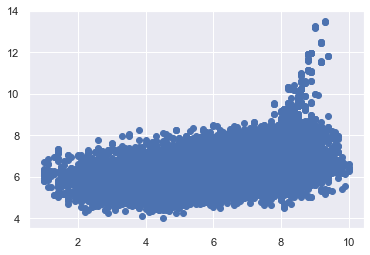

In [71]:
#Plot Multi linear regressor result
plt.scatter(yr_test,yr_pred)

##### Fitting a model when target variable is 'numVotes'

In [72]:
lin_reg.fit(xv_train, yv_train)

#Predict Response
yv_pred = lin_reg.predict(xv_test)

In [73]:
score=r2_score(yv_test,yv_pred)
numVotes_scores['Multi Linear Regressor'] = score
print("========= Multiple Linear Regression Results when target variable is 'numVotes' ===========\n")
print('r2 score:', score)
print('mean_sqrd_error is:', mean_squared_error(yv_test,yv_pred))
print('root_mean_squared error of is:', np.sqrt(mean_squared_error(yv_test,yv_pred)))
print('Intercept:', lin_reg.intercept_)
print('Slope:', lin_reg.coef_)

========= Multiple Linear Regression Results when target variable is 'numVotes' ===========

r2 score: 0.14585645808212
mean_sqrd_error is: 8772615730.791645
root_mean_squared error of is: 93662.24282383829
Intercept: -211262.21566146266
Slope: [-9.25240925e+17  6.92480000e+04  5.18400000e+03  1.74720000e+04
 -2.16000000e+04  1.79520000e+04  9.96800000e+03  3.81920000e+04
 -1.02880000e+04  1.22280000e+04  5.20000000e+03  1.02320000e+04
 -3.74480000e+04 -4.36000000e+03  2.56400000e+03  1.95880000e+04
 -8.53400000e+03  1.63736875e+04 -7.54400000e+03  6.83200000e+03
 -1.23650000e+03 -2.63300000e+03  1.15120000e+04  1.72353125e+04
  1.86617500e+04  6.84000000e+02  6.41260000e+04  1.35660000e+04
  7.04250000e+03  1.50571250e+04  1.41600000e+04  1.68400000e+03
  3.81500000e+03  2.38687000e+05 -6.08000000e+03 -8.28800000e+03
 -2.34880000e+04 -3.72800000e+03  9.25240925e+17 -1.17440000e+04
 -2.95200000e+03  1.14895000e+04 -1.66080000e+04  4.35040000e+04
  1.05920000e+04 -1.25728750e+04 -3.9235

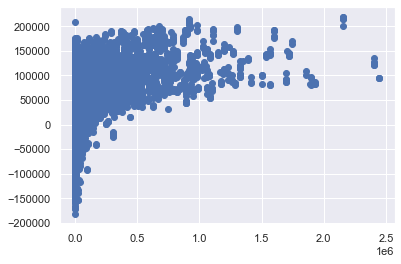

In [74]:
#Plot Multi linear regressor result
plt.scatter(yv_test,yv_pred)

## Random Forest Regressor

##### Fitting a model when target variable is 'averageRating'

In [75]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
rf_reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
rf_reg.fit(xr_train, yr_train)  
yr_pred = rf_reg.predict(xr_test)

In [76]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
# Model Accuracy, 
averageRating_scores['Random Forest Regressor'] = rf_reg.score(xr_test, yr_test)
print("[averageRating] Random Forest Regressor Accuracy:",rf_reg.score(xr_test, yr_test))
print("[averageRating] Random Forest Regressor MAE::", metrics.mean_absolute_error(yr_test,yr_pred))
print("[averageRating] Random Forest Regressor MSE:", metrics.mean_squared_error(yr_test, yr_pred))
print("[averageRating] Random Forest Regressor rRMSE:", np.sqrt(metrics.mean_squared_error(yr_test, yr_pred)))

[averageRating] Random Forest Regressor Accuracy: 0.5938056152715795
[averageRating] Random Forest Regressor MAE:: 0.48711500782106704
[averageRating] Random Forest Regressor MSE: 0.5637093436010955
[averageRating] Random Forest Regressor rRMSE: 0.7508057961957243


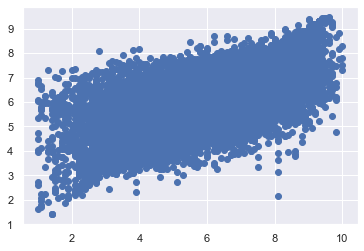

In [77]:
#Plot Random Forest Regressor result
plt.scatter(yr_test,yr_pred)

##### Fitting a model when target variable is 'numVotes'

In [78]:
# fit the regressor with x and y data
rf_reg.fit(xv_train, yv_train)  
yv_pred = rf_reg.predict(xv_test)
numVotes_scores['Random Forest Regressor'] = rf_reg.score(xv_test, yv_test)
print("[numVotes] Random Forest Regressor Accuracy:",rf_reg.score(xv_test, yv_test))
print("[numVotes] Random Forest Regressor MAE::", metrics.mean_absolute_error(yv_test,yv_pred))
print("[numVotes] Random Forest Regressor MSE:", metrics.mean_squared_error(yv_test, yv_pred))
print("[numVotes] Random Forest Regressor rRMSE:", np.sqrt(metrics.mean_squared_error(yv_test, yv_pred)))

[numVotes] Random Forest Regressor Accuracy: 0.9100575817433014
[numVotes] Random Forest Regressor MAE:: 9554.198535879354
[numVotes] Random Forest Regressor MSE: 923767767.9942174
[numVotes] Random Forest Regressor rRMSE: 30393.548131046125


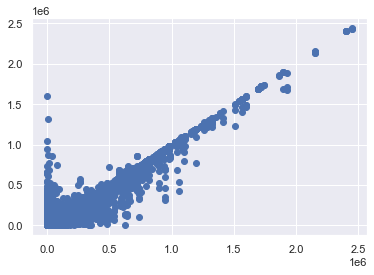

In [79]:
#Plot Random Forest Regressor result
plt.scatter(yv_test,yv_pred)

## Decision Tree Regressor

##### Fitting a model when target variable is 'averageRating'

In [80]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(criterion='mse', max_depth=2, splitter='best')
dt_reg.fit(xr_train, yr_train)
yr_pred = dt_reg.predict(xr_test)
averageRating_scores['Decision Tree Regressor'] = dt_reg.score(xr_test, yr_test)

In [81]:
print("[averageRating] Decision Tree Regressor Accuracy:",dt_reg.score(xr_test, yr_test))
print("[averageRating] Decision Tree Regressor MAE::", metrics.mean_absolute_error(yr_test,yr_pred))
print("[averageRating] Decision Tree Regressor MSE:", metrics.mean_squared_error(yr_test, yr_pred))
print("[averageRating] Decision Tree Regressor rRMSE:", np.sqrt(metrics.mean_squared_error(yr_test, yr_pred)))

[averageRating] Decision Tree Regressor Accuracy: 0.1065241586787552
[averageRating] Decision Tree Regressor MAE:: 0.8562185432420648
[averageRating] Decision Tree Regressor MSE: 1.2399498835302227
[averageRating] Decision Tree Regressor rRMSE: 1.1135303693793999


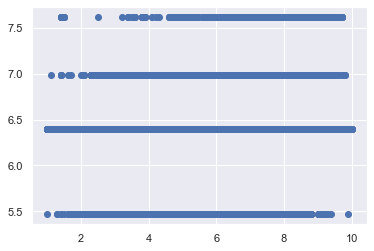

In [82]:
#Plot Decision Tree Regressor result
plt.scatter(yr_test,yr_pred)

##### Fitting a model when target variable is 'numVotes'

In [83]:
dt_reg.fit(xv_train, yv_train)
yv_pred = dt_reg.predict(xv_test)
numVotes_scores['Decision Tree Regressor'] = dt_reg.score(xv_test, yv_test)

In [84]:
print("[numVotes] Decision Tree Regressor Accuracy:",dt_reg.score(xv_test, yv_test))
print("[numVotes] Decision Tree Regressor MAE::", metrics.mean_absolute_error(yv_test,yv_pred))
print("[numVotes] Decision Tree Regressor MSE:", metrics.mean_squared_error(yv_test, yv_pred))
print("[numVotes] Decision Tree Regressor RMSE:", np.sqrt(metrics.mean_squared_error(yv_test, yv_pred)))

[numVotes] Decision Tree Regressor Accuracy: 0.12519244672549124
[numVotes] Decision Tree Regressor MAE:: 36719.36564950589
[numVotes] Decision Tree Regressor MSE: 8984848712.945185
[numVotes] Decision Tree Regressor RMSE: 94788.44187423478


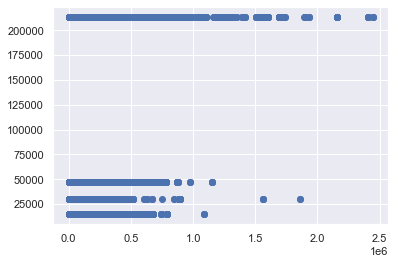

In [85]:
#Plot Decision Tree Regressor result
plt.scatter(yv_test,yv_pred)

## Using Gradient Boosting Regressor

##### Fitting a model when target variable is 'averageRating'

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10, max_depth=3, min_samples_split=5, learning_rate=0.01, loss='ls')
gbr.fit(xr_train, yr_train)
yr_pred = gbr.predict(xr_test)

In [87]:
# Model Accuracy, 
# print("[averageRating] Gradient Boosting Regressor Accuracy:",gbr.score(xr_test, yr_test))
# print("[averageRating] Gradient Boosting Regressor MAE::", metrics.mean_absolute_error(yr_test,yr_pred))
# print("[averageRating] Gradient Boosting RegressorMSE:", metrics.mean_squared_error(yr_test, yr_pred))
# print("[averageRating] Gradient Boosting Regressor rRMSE:", np.sqrt(metrics.mean_squared_error(yr_test, yr_pred)))

## Regressor Results & Comparison

In [88]:
averageRating_scores

{'Multi Linear Regressor': 0.2678090492533647,
 'Random Forest Regressor': 0.5938056152715795,
 'Decision Tree Regressor': 0.1065241586787552}

In [89]:
numVotes_scores

{'Multi Linear Regressor': 0.14585645808212,
 'Random Forest Regressor': 0.9100575817433014,
 'Decision Tree Regressor': 0.12519244672549124}

##### Regressor Comparison w.r.t. 'averageRating'

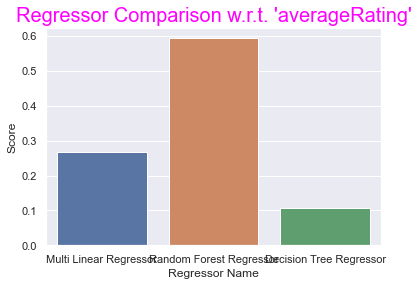

In [90]:
plt.title(label="Regressor Comparison w.r.t. 'averageRating'",
          fontsize=20,
          color="magenta")
with sns.color_palette('muted'):
    reg_name = list(averageRating_scores.keys())
    score = list(averageRating_scores.values())

    sns.set(rc={'figure.figsize':(14,7)})
    plt.xlabel("Regressor Name")
    plt.ylabel("Score")

    sns.barplot(reg_name,score)

##### Regressor Comparison w.r.t. 'numVotes'

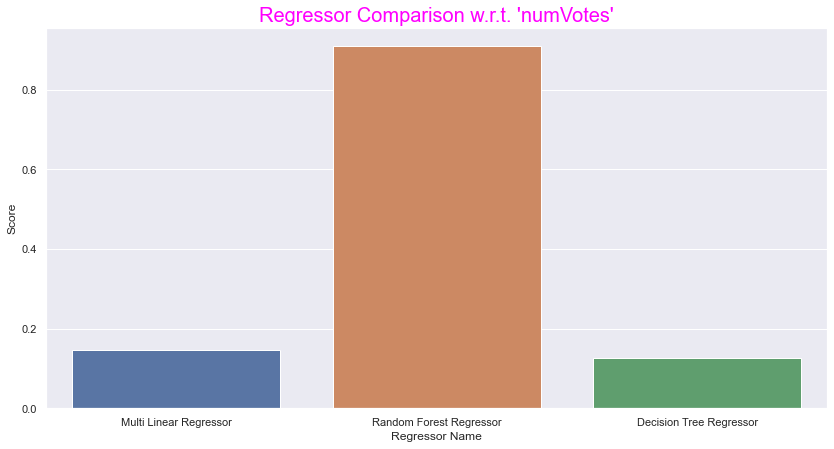

In [91]:
plt.title(label="Regressor Comparison w.r.t. 'numVotes'",
          fontsize=20,
          color="magenta")
with sns.color_palette('muted'):
    reg_name = list(numVotes_scores.keys())
    score = list(numVotes_scores.values())

    sns.set(rc={'figure.figsize':(14,7)})
    plt.xlabel("Regressor Name")
    plt.ylabel("Score")

    sns.barplot(reg_name,score)

## ============== CONCLUSION ================

##### In this analysis we have performed data exploration, visualization, cleaning and preprocessing & multiple model evaulation with respect to the data given. It has been observed that data is organized in multi dimensional and multi types.
##### To start our analysis with respect to the problem statement we have performed data exploration and merging 
##### Label encoding is performed on the features required on categorical attributes. The purpose of label encoding was to avoid unnecessary increase in dimensions
##### One hot encoding is performed on features like genre, type & title type
##### With respect to another aspect of problem statement  (i.e. Data Visualization and Exploration). All the required queries are answered with proper comments.
##### After exploring the data set as per the problem statement. We explored the feature which can be best suited for the modelling. In this case we performed multiple execution and final content has been included in the code.
##### To understand the results and the impact we decided to analyze the data w.r.t. two target variables and execution and modelling is performed around them one by one to understand the data

### Multiple Linear Regression
###### One of the assumption of multiple regression is that the predictor variables are numeric or are categorical with maximal two categories, for example sex (male, female) or smoker(yes, no).  However in our dataset we have the variable region, language, type, title etc. containing multiple categories & so many others.  Normally we use dummy variables to avoid such kind of conflict with concept and we have performed the same.
###### In this regressor, we are trying to fit a model around target variable average rating and number of votes one by one and observing the impact and results w.r.t the results returned.


### Decision Tree Regressor
##### It was taken into account because of the simplicity and it picks up the entire dataset using all feature of interests and produced the results w.r.t. the target.

### Random Forest Regressor
##### It is selected because it selects observations & features randomly to build the tree and then average the results.


#### As per the results and comarison shown above, it is clearly stated that the best model on the given data set is Random Forest Regressor. Although, this is not the final conclusion and the exploration can be done repeatedly to explore more. Current, the results are specific to the feature selection and the data sample generated after preprocessing. The more we analyze the dimensions, feature and sample we can find more better and different results.


###### NOTE: This code is generated after performing multiple attempts and final deployable code is prepared.